<a href="https://colab.research.google.com/github/zulmarina1687/MCC-RI-TrabajoFinal/blob/main/2018_2023_analisis_NYC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# linear algebra, probability
import numpy as np
# data manipulation
import pandas as pd
# visualization
import matplotlib.pyplot as plt
import seaborn as sns
## interactive visualization library
import plotly.offline as py
py.init_notebook_mode()
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.express as px

**Colección de Datos**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path="/content/drive/My Drive/datasets/"

In [ ]:
#historic_data_df = pd.read_csv(path+'NYPD_Complaint_Data_Historic.csv',low_memory=False)


**PASOS PARA REDUCIR EL DATASET**

In [ ]:
#YA NO EJECUTAR, POR QUE YA LO ACORTAMOS, SOLO FUE LA PRIMERA VEZ
#historic_data_clean_df = historic_data_df.loc[historic_data_df['CMPLNT_FR_DT'].notnull()]
#extraemos solo el año del campo y agregar la colunna
#historic_data_clean_df['Year']=historic_data_clean_df.CMPLNT_FR_DT.copy().str[-4:]
## cambiar el tipo a entero
#historic_data_clean_df.Year = historic_data_clean_df.Year.astype('int64')
#filtered_df = historic_data_clean_df[(historic_data_clean_df['Year'] >= 2018) & (historic_data_clean_df['Year'] <= 2023)]
#filtered_df.to_csv('/content/drive/My Drive/datasets/out.csv')

**LUEGO, LEO EL DATASET ESCRITO**

In [ ]:
historic_data_df = pd.read_csv(path+'NYPD_Complaint_Data_Historic_2018_2023.csv',low_memory=False)


**P1: Analiza el comportamiento de tus datos - Que problemas podriamos abordar?** Existen muchos y lo detallamos mas adelante

**P2. ¿Cuántos registros tenemos?**


In [ ]:
#cantidad de registros
print(len(historic_data_df))


2858568


In [ ]:
#cantidad de columnas, tenia 36 pero le añadi una que es la edad
print(len(historic_data_df.columns))

37


**P4. ¿Existen registros que necesitan limpieza?**

In [ ]:
#conteo por columnas, aquí ya podemos observar algunos problemas en los campos
historic_data_df.count()

Unnamed: 0           2858568
CMPLNT_NUM           2858568
CMPLNT_FR_DT         2858568
CMPLNT_FR_TM         2858568
CMPLNT_TO_DT         2584809
CMPLNT_TO_TM         2858568
ADDR_PCT_CD          2858471
RPT_DT               2858568
KY_CD                2858568
OFNS_DESC            2858568
PD_CD                2856247
PD_DESC              2858568
CRM_ATPT_CPTD_CD     2858568
LAW_CAT_CD           2858568
BORO_NM              2858568
LOC_OF_OCCUR_DESC    2858568
PREM_TYP_DESC        2858568
JURIS_DESC           2858568
JURISDICTION_CODE    2858568
PARKS_NM             2858568
HADEVELOPT           2858568
HOUSING_PSA          2858568
X_COORD_CD           2858553
Y_COORD_CD           2858553
SUSP_AGE_GROUP       2858568
SUSP_RACE            2858568
SUSP_SEX             2858568
TRANSIT_DISTRICT       65996
Latitude             2858553
Longitude            2858553
Lat_Lon              2858553
PATROL_BORO          2858568
STATION_NAME         2858568
VIC_AGE_GROUP        2858568
VIC_RACE             2858568
VIC_SEX              2858568
Year                 2858568
dtype: int64

In [ ]:
#hay duplicados? no hay
duplicados_historic_data_df = historic_data_df.duplicated().any()
duplicados_historic_data_df

False

**P3. ¿Cuál es el significado de los atributos o campos?**

In [ ]:
historic_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2858568 entries, 0 to 2858567
Data columns (total 37 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   CMPLNT_NUM         object 
 2   CMPLNT_FR_DT       object 
 3   CMPLNT_FR_TM       object 
 4   CMPLNT_TO_DT       object 
 5   CMPLNT_TO_TM       object 
 6   ADDR_PCT_CD        float64
 7   RPT_DT             object 
 8   KY_CD              int64  
 9   OFNS_DESC          object 
 10  PD_CD              float64
 11  PD_DESC            object 
 12  CRM_ATPT_CPTD_CD   object 
 13  LAW_CAT_CD         object 
 14  BORO_NM            object 
 15  LOC_OF_OCCUR_DESC  object 
 16  PREM_TYP_DESC      object 
 17  JURIS_DESC         object 
 18  JURISDICTION_CODE  int64  
 19  PARKS_NM           object 
 20  HADEVELOPT         object 
 21  HOUSING_PSA        object 
 22  X_COORD_CD         float64
 23  Y_COORD_CD         float64
 24  SUSP_AGE_GROUP     object 
 25  SUSP_RACE         

**¿Qué datos son discretos y cuáles continuos?**

In [ ]:
historic_data_df.head()

Unnamed: 0 CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT CMPLNT_TO_TM  \
0         105  183915130   06/16/2018     11:38:00          NaN       (null)   
1         106  192830904   01/18/2019     17:00:00          NaN       (null)   
2         107  195777958   04/05/2019     14:15:00          NaN       (null)   
3         108  199498775   07/07/2019     21:00:00          NaN       (null)   
4         109  238829557   01/06/2022     23:09:00          NaN       (null)   

   ADDR_PCT_CD      RPT_DT  KY_CD      OFNS_DESC  ...  TRANSIT_DISTRICT  \
0        102.0  06/16/2018    105        ROBBERY  ...               NaN   
1        108.0  01/28/2019    116     SEX CRIMES  ...               NaN   
2         44.0  04/05/2019    578  HARRASSMENT 2  ...               NaN   
3         69.0  07/08/2019    341  PETIT LARCENY  ...               NaN   
4          6.0  01/08/2022    114          ARSON  ...               NaN   

    Latitude  Longitude                                Lat_Lon  \
0  40.684675 -73.844567                (40.684675, -73.844567)   
1  40.743125 -73.956068  (40.7431245994984, -73.9560680726795)   
2  40.839882 -73.916783            (40.83988211, -73.91678321)   
3  40.648331 -73.899374                (40.648331, -73.899374)   
4  40.734408 -73.990849                (40.734408, -73.990849)   

                PATROL_BORO STATION_NAME VIC_AGE_GROUP        VIC_RACE  \
0  PATROL BORO QUEENS SOUTH       (null)       UNKNOWN         UNKNOWN   
1  PATROL BORO QUEENS NORTH       (null)           <18  WHITE HISPANIC   
2         PATROL BORO BRONX       (null)         25-44  WHITE HISPANIC   
3   PATROL BORO BKLYN SOUTH       (null)         18-24           BLACK   
4     PATROL BORO MAN SOUTH       (null)       UNKNOWN         UNKNOWN   

   VIC_SEX  Year  
0        D  2018  
1        F  2019  
2        F  2019  
3        M  2019  
4        E  2022  

[5 rows x 37 columns]

**P5 Resumen de los datos**


In [ ]:
historic_data_df.describe()

Unnamed: 0   ADDR_PCT_CD         KY_CD         PD_CD  \
count  2.858568e+06  2.858471e+06  2.858568e+06  2.856247e+06   
mean   7.481073e+06  6.331129e+01  3.035835e+02  4.036515e+02   
std    8.295894e+05  3.490084e+01  1.585278e+02  2.179906e+02   
min    1.050000e+02  1.000000e+00  1.010000e+02  1.000000e+02   
25%    6.765121e+06  4.000000e+01  1.170000e+02  2.540000e+02   
50%    7.482458e+06  6.300000e+01  3.410000e+02  3.520000e+02   
75%    8.198935e+06  1.000000e+02  3.510000e+02  6.380000e+02   
max    8.914837e+06  1.230000e+02  8.810000e+02  9.690000e+02   

       JURISDICTION_CODE    X_COORD_CD    Y_COORD_CD  TRANSIT_DISTRICT  \
count       2.858568e+06  2.858553e+06  2.858553e+06      65996.000000   
mean        6.691476e-01  1.005293e+06  2.077166e+05         14.168874   
std         6.629508e+00  2.136319e+04  3.007192e+04         12.631629   
min         0.000000e+00  0.000000e+00  0.000000e+00          1.000000   
25%         0.000000e+00  9.917630e+05  1.852870e+05          3.000000   
50%         0.000000e+00  1.004560e+06  2.069970e+05         11.000000   
75%         0.000000e+00  1.017227e+06  2.350900e+05         30.000000   
max         9.700000e+01  1.067306e+06  2.718190e+05         34.000000   

           Latitude     Longitude          Year  
count  2.858553e+06  2.858553e+06  2.858568e+06  
mean   4.073672e+01 -7.392396e+01  2.020614e+03  
std    9.249179e-02  1.079696e-01  1.743777e+00  
min    0.000000e+00 -7.425474e+01  2.018000e+03  
25%    4.067519e+01 -7.397291e+01  2.019000e+03  
50%    4.073468e+01 -7.392671e+01  2.021000e+03  
75%    4.081194e+01 -7.388095e+01  2.022000e+03  
max    4.091271e+01  0.000000e+00  2.023000e+03

#**P10 Limpieza de datos**

**Una vez definido nuestro objetivo primero seleccionamos las columnas que realmente usaremos**

In [ ]:
columnas = ['CMPLNT_NUM','BORO_NM','CMPLNT_FR_DT','CMPLNT_FR_TM','CMPLNT_TO_DT','CMPLNT_TO_TM','CRM_ATPT_CPTD_CD','KY_CD','LAW_CAT_CD','OFNS_DESC','PD_CD','PD_DESC','PREM_TYP_DESC','RPT_DT','VIC_AGE_GROUP','VIC_RACE','VIC_SEX','SUSP_AGE_GROUP','SUSP_RACE','SUSP_SEX','X_COORD_CD','Y_COORD_CD','Latitude','Longitude','Year']


In [ ]:
historic_data_select_df = historic_data_df

In [ ]:
historic_data_select_df = historic_data_df[columnas]

In [ ]:
historic_data_select_df.head()

CMPLNT_NUM    BORO_NM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT CMPLNT_TO_TM  \
0  183915130     QUEENS   06/16/2018     11:38:00          NaN       (null)   
1  192830904     QUEENS   01/18/2019     17:00:00          NaN       (null)   
2  195777958      BRONX   04/05/2019     14:15:00          NaN       (null)   
3  199498775   BROOKLYN   07/07/2019     21:00:00          NaN       (null)   
4  238829557  MANHATTAN   01/06/2022     23:09:00          NaN       (null)   

  CRM_ATPT_CPTD_CD  KY_CD   LAW_CAT_CD      OFNS_DESC  ...        VIC_RACE  \
0        COMPLETED    105       FELONY        ROBBERY  ...         UNKNOWN   
1        COMPLETED    116       FELONY     SEX CRIMES  ...  WHITE HISPANIC   
2        COMPLETED    578    VIOLATION  HARRASSMENT 2  ...  WHITE HISPANIC   
3        COMPLETED    341  MISDEMEANOR  PETIT LARCENY  ...           BLACK   
4        COMPLETED    114       FELONY          ARSON  ...         UNKNOWN   

  VIC_SEX SUSP_AGE_GROUP       SUSP_RACE SUSP_SEX X_COORD_CD Y_COORD_CD  \
0       D          45-64           WHITE        M  1027358.0   188760.0   
1       F         (null)          (null)   (null)   996424.0   210017.0   
2       F        UNKNOWN  WHITE HISPANIC        F  1007276.0   245280.0   
3       M        UNKNOWN         UNKNOWN        U  1012173.0   175496.0   
4       E        UNKNOWN         UNKNOWN        U   986785.0   206841.0   

    Latitude  Longitude  Year  
0  40.684675 -73.844567  2018  
1  40.743125 -73.956068  2019  
2  40.839882 -73.916783  2019  
3  40.648331 -73.899374  2019  
4  40.734408 -73.990849  2022  

[5 rows x 25 columns]

In [ ]:
print(len(historic_data_select_df))

2858568


In [ ]:
#cantidad de columnas
print(len(historic_data_select_df.columns))

25


In [ ]:
#cantidad de columnas
print(len(historic_data_select_df.columns))

37


In [ ]:
historic_data_select_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2858568 entries, 0 to 2858567
Data columns (total 25 columns):
 #   Column            Dtype  
---  ------            -----  
 0   CMPLNT_NUM        object 
 1   BORO_NM           object 
 2   CMPLNT_FR_DT      object 
 3   CMPLNT_FR_TM      object 
 4   CMPLNT_TO_DT      object 
 5   CMPLNT_TO_TM      object 
 6   CRM_ATPT_CPTD_CD  object 
 7   KY_CD             int64  
 8   LAW_CAT_CD        object 
 9   OFNS_DESC         object 
 10  PD_CD             float64
 11  PD_DESC           object 
 12  PREM_TYP_DESC     object 
 13  RPT_DT            object 
 14  VIC_AGE_GROUP     object 
 15  VIC_RACE          object 
 16  VIC_SEX           object 
 17  SUSP_AGE_GROUP    object 
 18  SUSP_RACE         object 
 19  SUSP_SEX          object 
 20  X_COORD_CD        float64
 21  Y_COORD_CD        float64
 22  Latitude          float64
 23  Longitude         float64
 24  Year              int64  
dtypes: float64(5), int64(2), object(18)
memory us

In [ ]:
#vericamos el porcentaje de nulos Nan

In [ ]:
(historic_data_select_df.isna().sum()/historic_data_select_df.shape[0]*100).sort_values(ascending=False)

TRANSIT_DISTRICT     97.691292
CMPLNT_TO_DT          9.576788
PD_CD                 0.081195
ADDR_PCT_CD           0.003393
Latitude              0.000525
X_COORD_CD            0.000525
Y_COORD_CD            0.000525
Lat_Lon               0.000525
Longitude             0.000525
SUSP_AGE_GROUP        0.000000
SUSP_RACE             0.000000
SUSP_SEX              0.000000
Unnamed: 0            0.000000
HADEVELOPT            0.000000
PATROL_BORO           0.000000
STATION_NAME          0.000000
VIC_AGE_GROUP         0.000000
VIC_RACE              0.000000
VIC_SEX               0.000000
HOUSING_PSA           0.000000
JURISDICTION_CODE     0.000000
PARKS_NM              0.000000
CMPLNT_NUM            0.000000
JURIS_DESC            0.000000
PREM_TYP_DESC         0.000000
LOC_OF_OCCUR_DESC     0.000000
BORO_NM               0.000000
LAW_CAT_CD            0.000000
CRM_ATPT_CPTD_CD      0.000000
PD_DESC               0.000000
OFNS_DESC             0.000000
KY_CD                 0.000000
RPT_DT                0.000000
CMPLNT_TO_TM          0.000000
CMPLNT_FR_TM          0.000000
CMPLNT_FR_DT          0.000000
Year                  0.000000
dtype: float64

In [ ]:
#verificamos nulos

In [ ]:
null_counts = historic_data_select_df.isnull().sum()
print(null_counts)

CMPLNT_NUM               0
BORO_NM                  0
CMPLNT_FR_DT             0
CMPLNT_FR_TM             0
CMPLNT_TO_DT        273759
CMPLNT_TO_TM             0
CRM_ATPT_CPTD_CD         0
KY_CD                    0
LAW_CAT_CD               0
OFNS_DESC                0
PD_CD                 2321
PD_DESC                  0
PREM_TYP_DESC            0
RPT_DT                   0
VIC_AGE_GROUP            0
VIC_RACE                 0
VIC_SEX                  0
SUSP_AGE_GROUP           0
SUSP_RACE                0
SUSP_SEX                 0
X_COORD_CD              15
Y_COORD_CD              15
Latitude                15
Longitude               15
Year                     0
dtype: int64


In [ ]:
historic_data_select_df.std()

NameError: name 'historic_data_select_df' is not defined

In [ ]:
# Calculando las medidas de tendencia central y dispersión
media_aritmetica = historic_data_select_df.mean()
media_geometrica = np.prod(historic_data_select_df) ** (1 / len(historic_data_select_df))
media_armonica = len(historic_data_select_df) / np.sum(1 / historic_data_select_df)
mediana = historic_data_select_df.median()
moda = historic_data_select_df.mode().iloc[0]
desviacion_estandar = historic_data_select_df.std()

# Mostrando los resultados
print("Media aritmética:\n", media_aritmetica)
print("\nMedia geométrica:\n", media_geometrica)
print("\nMedia armónica:\n", media_armonica)
print("\nMediana:\n", mediana)
print("\nModa:\n", moda)
print("\nDesviación estándar:\n", desviacion_estandar)

**Valores Unicos**

In [ ]:
resultados = []

for columna in historic_data_select_df.columns:
    valores_frecuencia = historic_data_select_df[columna].value_counts().head(10)
    top_10_dict = valores_frecuencia.to_dict()
    total_frecuencia = sum(top_10_dict.values())
    valores_unicos = historic_data_select_df[columna].nunique()

    info_columna = {
        'Campo': columna,
        'Top 10': top_10_dict,
        'Total Frecuencia': total_frecuencia,
        'Valores Únicos': valores_unicos
    }

    resultados.append(info_columna)

resultados_df = pd.DataFrame(resultados)

resultados_df = resultados_df.sort_values(by='Total Frecuencia', ascending=False)

resultados_df = resultados_df.drop(columns=['Total Frecuencia'])

print(resultados_df)

resultados_df.to_csv('resultados_top_10.csv', index=False)

               Campo                                             Top 10  \
24              Year  {2023: 543331, 2022: 529839, 2018: 462719, 201...   
1            BORO_NM  {'BROOKLYN': 812632, 'MANHATTAN': 700837, 'BRO...   
19          SUSP_SEX  {'M': 1348900, '(null)': 573573, 'U': 554709, ...   
18         SUSP_RACE  {'BLACK': 829831, 'UNKNOWN': 658552, '(null)':...   
16           VIC_SEX  {'F': 1119257, 'M': 1003287, 'D': 451263, 'E':...   
6   CRM_ATPT_CPTD_CD  {'COMPLETED': 2814045, 'ATTEMPTED': 44362, '(n...   
15          VIC_RACE  {'UNKNOWN': 843321, 'BLACK': 720652, 'WHITE HI...   
8         LAW_CAT_CD  {'MISDEMEANOR': 1477344, 'FELONY': 926314, 'VI...   
14     VIC_AGE_GROUP  {'25-44': 1032737, 'UNKNOWN': 782836, '45-64':...   
17    SUSP_AGE_GROUP  {'UNKNOWN': 988936, '25-44': 736958, '(null)':...   
12     PREM_TYP_DESC  {'STREET': 820432, 'RESIDENCE - APT. HOUSE': 6...   
9          OFNS_DESC  {'PETIT LARCENY': 568470, 'HARRASSMENT 2': 449...   
7              KY_CD  {34

In [ ]:
#NULOS

In [ ]:
resultados_nulos = []

for columna in historic_data_select_df.columns:
    valores_nulos = historic_data_select_df[columna].isnull().sum()

    info_columna = {
        'Campo': columna,
        'Valores Nulos': valores_nulos
    }

    resultados_nulos.append(info_columna)

resultados_nulos_df = pd.DataFrame(resultados_nulos)

print(resultados_nulos_df)

resultados_nulos_df.to_csv('resultados_nulos.csv', index=False)

               Campo  Valores Nulos
0         CMPLNT_NUM              0
1            BORO_NM              0
2       CMPLNT_FR_DT              0
3       CMPLNT_FR_TM              0
4       CMPLNT_TO_DT         273759
5       CMPLNT_TO_TM              0
6   CRM_ATPT_CPTD_CD              0
7              KY_CD              0
8         LAW_CAT_CD              0
9          OFNS_DESC              0
10             PD_CD           2321
11           PD_DESC              0
12     PREM_TYP_DESC              0
13            RPT_DT              0
14     VIC_AGE_GROUP              0
15          VIC_RACE              0
16           VIC_SEX              0
17    SUSP_AGE_GROUP              0
18         SUSP_RACE              0
19          SUSP_SEX              0
20        X_COORD_CD             15
21        Y_COORD_CD             15
22          Latitude             15
23         Longitude             15
24              Year              0



**Durante el analisis nos encontramos con ciertas inconsistencias como que en vez de nulo el valor estaba de esta forma "(null)", convirtiendolo en un campo string**



In [ ]:
#verificamos que campos tenian esta inconveniente
for columna in historic_data_select_df.columns:
    # Calcular la frecuencia de "(null)" en la columna actual
    frecuencia_null = (historic_data_select_df[columna] == '(null)').sum()

    # Mostrar el resultado
    print(f"Columna: {columna}")
    print(f"Frecuencia de '(null)': {frecuencia_null}")
    print("\n")

Columna: CMPLNT_NUM
Frecuencia de '(null)': 0


Columna: BORO_NM
Frecuencia de '(null)': 2866


Columna: CMPLNT_FR_DT
Frecuencia de '(null)': 0


Columna: CMPLNT_FR_TM
Frecuencia de '(null)': 0


Columna: CMPLNT_TO_DT
Frecuencia de '(null)': 0


Columna: CMPLNT_TO_TM
Frecuencia de '(null)': 272362


Columna: CRM_ATPT_CPTD_CD
Frecuencia de '(null)': 161


Columna: KY_CD
Frecuencia de '(null)': 0


Columna: LAW_CAT_CD
Frecuencia de '(null)': 0


Columna: OFNS_DESC
Frecuencia de '(null)': 58


Columna: PD_CD
Frecuencia de '(null)': 0


Columna: PD_DESC
Frecuencia de '(null)': 2321


Columna: PREM_TYP_DESC
Frecuencia de '(null)': 23825


Columna: RPT_DT
Frecuencia de '(null)': 0


Columna: VIC_AGE_GROUP
Frecuencia de '(null)': 4


Columna: VIC_RACE
Frecuencia de '(null)': 366


Columna: VIC_SEX
Frecuencia de '(null)': 4


Columna: SUSP_AGE_GROUP
Frecuencia de '(null)': 573573


Columna: SUSP_RACE
Frecuencia de '(null)': 573573


Columna: SUSP_SEX
Frecuencia de '(null)': 573573


Columna: X

In [ ]:
# Verificamos las columnas que presentaban null
columnas_nulas = ['CMPLNT_TO_DT', 'PD_CD', 'Longitude', 'Latitude', 'Y_COORD_CD', 'X_COORD_CD']

# Contar los valores nulos en las columnas seleccionadas
conteo_nulos = historic_data_select_df[columnas_nulas].isnull().sum()

# Mostrar los resultados
print(conteo_nulos)

CMPLNT_TO_DT    273759
PD_CD             2321
Longitude           15
Latitude            15
Y_COORD_CD          15
X_COORD_CD          15
dtype: int64


In [ ]:
#Conteo de registros por año, ya observa información mas consistente
with pd.option_context('display.max_rows', None):
    # Realizar la operación de agrupación
    grouped_data = historic_data_select_df.groupby('Year').size()

    # Imprimir o hacer lo que necesites con grouped_data
    print(grouped_data)

Year
2018    462719
2019    459296
2020    413812
2021    449571
2022    529839
2023    543331
dtype: int64


In [ ]:
#conteo por columnas, aquí tambien ya vemos algunas inconsistencias
historic_data_select_df.count()

CMPLNT_NUM          2858568
BORO_NM             2858568
CMPLNT_FR_DT        2858568
CMPLNT_FR_TM        2858568
CMPLNT_TO_DT        2584809
CMPLNT_TO_TM        2858568
CRM_ATPT_CPTD_CD    2858568
KY_CD               2858568
LAW_CAT_CD          2858568
OFNS_DESC           2858568
PD_CD               2856247
PD_DESC             2858568
PREM_TYP_DESC       2858568
RPT_DT              2858568
VIC_AGE_GROUP       2858568
VIC_RACE            2858568
VIC_SEX             2858568
SUSP_AGE_GROUP      2858568
SUSP_RACE           2858568
SUSP_SEX            2858568
X_COORD_CD          2858553
Y_COORD_CD          2858553
Latitude            2858553
Longitude           2858553
Year                2858568
dtype: int64

In [ ]:
historic_data_select_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2858568 entries, 0 to 2858567
Data columns (total 25 columns):
 #   Column            Dtype  
---  ------            -----  
 0   CMPLNT_NUM        object 
 1   BORO_NM           object 
 2   CMPLNT_FR_DT      object 
 3   CMPLNT_FR_TM      object 
 4   CMPLNT_TO_DT      object 
 5   CMPLNT_TO_TM      object 
 6   CRM_ATPT_CPTD_CD  object 
 7   KY_CD             int64  
 8   LAW_CAT_CD        object 
 9   OFNS_DESC         object 
 10  PD_CD             float64
 11  PD_DESC           object 
 12  PREM_TYP_DESC     object 
 13  RPT_DT            object 
 14  VIC_AGE_GROUP     object 
 15  VIC_RACE          object 
 16  VIC_SEX           object 
 17  SUSP_AGE_GROUP    object 
 18  SUSP_RACE         object 
 19  SUSP_SEX          object 
 20  X_COORD_CD        float64
 21  Y_COORD_CD        float64
 22  Latitude          float64
 23  Longitude         float64
 24  Year              int64  
dtypes: float64(5), int64(2), object(18)
memory us

In [ ]:
#en la información de las columnas encontramos campos de fecha, hora que no tienen el formato correcto, así lo convertimos

In [ ]:
#creamos unas columnas que tengan fecha y hora, ademas convertimos a formato fechas algunos campos
historic_data_select_df.loc[:,'CMPLNT_FR'] = historic_data_select_df['CMPLNT_FR_DT'] + ' ' + historic_data_select_df['CMPLNT_FR_TM']
historic_data_select_df.loc[:,'CMPLNT_TO'] = historic_data_select_df['CMPLNT_TO_DT']  + ' ' + historic_data_select_df['CMPLNT_TO_TM']

historic_data_select_df.CMPLNT_FR_DT = pd.to_datetime(historic_data_select_df.CMPLNT_FR_DT,format='%m/%d/%Y',errors='coerce')
historic_data_select_df.CMPLNT_TO_DT = pd.to_datetime(historic_data_select_df.CMPLNT_TO_DT,format='%m/%d/%Y',errors='coerce')
historic_data_select_df.CMPLNT_FR = pd.to_datetime(historic_data_select_df.CMPLNT_FR,format='%m/%d/%Y %H:%M:%S',errors='coerce')
historic_data_select_df.CMPLNT_TO = pd.to_datetime(historic_data_select_df.CMPLNT_TO,format='%m/%d/%Y %H:%M:%S',errors='coerce')
historic_data_select_df.CMPLNT_FR_TM = pd.to_datetime(historic_data_select_df.CMPLNT_FR_TM,format='%H:%M:%S',errors='coerce')
historic_data_select_df.CMPLNT_TO_TM = pd.to_datetime(historic_data_select_df.CMPLNT_TO_TM,format='%H:%M:%S',errors='coerce')
historic_data_select_df.RPT_DT = pd.to_datetime(historic_data_select_df.RPT_DT,format='%m/%d/%Y',errors='coerce').copy()

In [ ]:
historic_data_select_df.head()

CMPLNT_NUM    BORO_NM CMPLNT_FR_DT        CMPLNT_FR_TM CMPLNT_TO_DT  \
0  183915130     QUEENS   2018-06-16 1900-01-01 11:38:00          NaT   
1  192830904     QUEENS   2019-01-18 1900-01-01 17:00:00          NaT   
2  195777958      BRONX   2019-04-05 1900-01-01 14:15:00          NaT   
3  199498775   BROOKLYN   2019-07-07 1900-01-01 21:00:00          NaT   
4  238829557  MANHATTAN   2022-01-06 1900-01-01 23:09:00          NaT   

  CMPLNT_TO_TM CRM_ATPT_CPTD_CD  KY_CD   LAW_CAT_CD      OFNS_DESC  ...  \
0          NaT        COMPLETED    105       FELONY        ROBBERY  ...   
1          NaT        COMPLETED    116       FELONY     SEX CRIMES  ...   
2          NaT        COMPLETED    578    VIOLATION  HARRASSMENT 2  ...   
3          NaT        COMPLETED    341  MISDEMEANOR  PETIT LARCENY  ...   
4          NaT        COMPLETED    114       FELONY          ARSON  ...   

   SUSP_AGE_GROUP       SUSP_RACE SUSP_SEX X_COORD_CD Y_COORD_CD   Latitude  \
0           45-64           WHITE        M  1027358.0   188760.0  40.684675   
1          (null)          (null)   (null)   996424.0   210017.0  40.743125   
2         UNKNOWN  WHITE HISPANIC        F  1007276.0   245280.0  40.839882   
3         UNKNOWN         UNKNOWN        U  1012173.0   175496.0  40.648331   
4         UNKNOWN         UNKNOWN        U   986785.0   206841.0  40.734408   

   Longitude  Year           CMPLNT_FR CMPLNT_TO  
0 -73.844567  2018 2018-06-16 11:38:00       NaT  
1 -73.956068  2019 2019-01-18 17:00:00       NaT  
2 -73.916783  2019 2019-04-05 14:15:00       NaT  
3 -73.899374  2019 2019-07-07 21:00:00       NaT  
4 -73.990849  2022 2022-01-06 23:09:00       NaT  

[5 rows x 27 columns]

**Analizamos cada campo para poder uniformizar las inconsistencias encontradas**

** **

In [ ]:
######### Datos como grupo de edad, raza y sexo de la  victima ###############

In [ ]:
historic_data_select_df.groupby('VIC_AGE_GROUP').size()

VIC_AGE_GROUP
18-24       255136
25-44      1032737
45-64       548749
65+         134395
<18         104530
UNKNOWN     783021
dtype: int64

In [ ]:
Age_Group = { '18-24',
 '25-44',
 '45-64',
 '65+',
 '<18',
 'UNKNOWN'}

historic_data_select_1_df = historic_data_select_df.loc[~historic_data_select_df.VIC_AGE_GROUP.isin(Age_Group),'VIC_AGE_GROUP'] = 'UNKNOWN'

In [ ]:
historic_data_select_df.groupby('VIC_AGE_GROUP').size()

VIC_AGE_GROUP
18-24       255136
25-44      1032737
45-64       548749
65+         134395
<18         104530
UNKNOWN     783021
dtype: int64

In [ ]:
Age_Group = { '18-24',
 '25-44',
 '45-64',
 '65+',
 '<18',
 'UNKNOWN'}

historic_data_select_1_df = historic_data_select_df.loc[~historic_data_select_df.SUSP_AGE_GROUP.isin(Age_Group),'SUSP_AGE_GROUP'] = 'UNKNOWN'

In [ ]:
historic_data_select_df.groupby('VIC_RACE').size()

VIC_RACE
(null)                               366
AMERICAN INDIAN/ALASKAN NATIVE     12572
ASIAN / PACIFIC ISLANDER          222551
BLACK                             720652
BLACK HISPANIC                    119691
UNKNOWN                           843321
WHITE                             433241
WHITE HISPANIC                    506174
dtype: int64

In [ ]:
historic_data_select_df.groupby('VIC_SEX').size()

VIC_SEX
(null)          4
D          451263
E          278695
F         1119257
L            6061
M         1003287
U               1
dtype: int64

In [ ]:
historic_data_select_df.VIC_RACE = historic_data_select_df.VIC_RACE.fillna(value='UNKNOWN')
historic_data_select_df.VIC_SEX = historic_data_select_df.VIC_SEX.fillna(value='U')
historic_data_select_df['VIC_RACE'].replace('(null)', 'UNKNOWN', inplace=True)
historic_data_select_df['VIC_SEX'].replace('(null)', 'UNKNOWN', inplace=True)
historic_data_select_df['VIC_SEX'].replace('U', 'UNKNOWN', inplace=True)

In [ ]:
historic_data_select_df.groupby('VIC_RACE').size()

VIC_RACE
AMERICAN INDIAN/ALASKAN NATIVE     12572
ASIAN / PACIFIC ISLANDER          222551
BLACK                             720652
BLACK HISPANIC                    119691
UNKNOWN                           843687
WHITE                             433241
WHITE HISPANIC                    506174
dtype: int64

In [ ]:
historic_data_select_df.groupby('VIC_SEX').size()

VIC_SEX
D           451263
E           278695
F          1119257
L             6061
M          1003287
UNKNOWN          5
dtype: int64

In [ ]:
################## Datos como grupo de edad, raza y sexo de la  victima ###############################

In [ ]:
historic_data_select_df.groupby('SUSP_RACE').size()

SUSP_RACE
(null)                            573573
AMERICAN INDIAN/ALASKAN NATIVE      5694
ASIAN / PACIFIC ISLANDER           82756
BLACK                             829831
BLACK HISPANIC                    121379
UNKNOWN                           658552
WHITE                             209569
WHITE HISPANIC                    377214
dtype: int64

In [ ]:
historic_data_select_df.groupby('SUSP_SEX').size()

SUSP_SEX
(null)     573573
F          381386
M         1348900
U          554709
dtype: int64

In [ ]:
historic_data_select_df.SUSP_RACE = historic_data_select_df.SUSP_RACE.fillna(value='UNKNOWN')
historic_data_select_df.SUSP_SEX = historic_data_select_df.SUSP_SEX.fillna(value='U')
historic_data_select_df['SUSP_RACE'].replace('(null)', 'UNKNOWN', inplace=True)
historic_data_select_df['SUSP_SEX'].replace('(null)', 'UNKNOWN', inplace=True)
historic_data_select_df['SUSP_SEX'].replace('U', 'UNKNOWN', inplace=True)

In [ ]:
historic_data_select_df.groupby('SUSP_RACE').size()

SUSP_RACE
AMERICAN INDIAN/ALASKAN NATIVE       5694
ASIAN / PACIFIC ISLANDER            82756
BLACK                              829831
BLACK HISPANIC                     121379
UNKNOWN                           1232125
WHITE                              209569
WHITE HISPANIC                     377214
dtype: int64

In [ ]:
historic_data_select_df.groupby('SUSP_SEX').size()

SUSP_SEX
F           381386
M          1348900
UNKNOWN    1128282
dtype: int64

In [ ]:
#########BORO_NM################

In [ ]:
historic_data_select_df.groupby('BORO_NM').size()

BORO_NM
(null)             2866
BRONX            615964
BROOKLYN         812632
MANHATTAN        700837
QUEENS           603767
STATEN ISLAND    122502
dtype: int64

In [ ]:
historic_data_select_df['BORO_NM'].replace('(null)', 'UNKNOWN', inplace=True)

In [ ]:
historic_data_select_df.groupby('BORO_NM').size()

BORO_NM
BRONX            615964
BROOKLYN         812632
MANHATTAN        700837
QUEENS           603767
STATEN ISLAND    122502
UNKNOWN            2866
dtype: int64

In [ ]:
#########CRM_ATPT_CPTD_CD################

In [ ]:
historic_data_select_df.groupby('CRM_ATPT_CPTD_CD').size()

CRM_ATPT_CPTD_CD
(null)           161
ATTEMPTED      44362
COMPLETED    2814045
dtype: int64

In [ ]:
historic_data_select_df['CRM_ATPT_CPTD_CD'].replace('(null)', 'UNKNOWN', inplace=True)

In [ ]:
historic_data_select_df.groupby('CRM_ATPT_CPTD_CD').size()

CRM_ATPT_CPTD_CD
ATTEMPTED      44362
COMPLETED    2814045
UNKNOWN          161
dtype: int64

In [ ]:
#########KY_CD################

In [ ]:
historic_data_select_df.groupby('KY_CD').size()

KY_CD
101     2321
102       24
103       89
104     8200
105    87741
       ...  
675     1698
676       15
677      374
678     3009
881        3
Length: 71, dtype: int64

In [ ]:
#########LAW_CAT_CD################

In [ ]:
historic_data_select_df.groupby('LAW_CAT_CD').size()

LAW_CAT_CD
FELONY          926314
MISDEMEANOR    1477344
VIOLATION       454910
dtype: int64

In [ ]:
#########OFNS_DESC################

In [ ]:
historic_data_select_df.groupby('OFNS_DESC').size()

OFNS_DESC
(null)                                     58
ABORTION                                    1
ADMINISTRATIVE CODE                      6662
AGRICULTURE & MRKTS LAW-UNCLASSIFIED      817
ALCOHOLIC BEVERAGE CONTROL LAW            485
                                        ...  
THEFT OF SERVICES                        1423
THEFT-FRAUD                             20505
UNAUTHORIZED USE OF A VEHICLE            9026
UNLAWFUL POSS. WEAP. ON SCHOOL             37
VEHICLE AND TRAFFIC LAWS                64422
Length: 69, dtype: int64

In [ ]:
#########PD_CD################

In [ ]:
historic_data_select_df.groupby('PD_CD').size()

PD_CD
100.0        48
101.0    239904
102.0       129
103.0       193
104.0       104
          ...  
916.0     43387
917.0        34
918.0       469
922.0     20532
969.0         3
Length: 409, dtype: int64

In [ ]:
historic_data_select_df.groupby('PD_DESC').size()

PD_DESC
(null)                             2321
A.B.C.,FALSE PROOF OF AGE             6
ABANDON ANIMAL                      329
ABORTION 1                            1
ABSCONDING FROM WORK RELEASE 2        5
                                  ...  
VEHICULAR ASSAULT (INTOX DRIVE      104
VIOLATION OF ORDER OF PROTECTI    15323
WEAPONS DISPOSITION OF                3
WEAPONS POSSESSION 3              16293
WEAPONS, POSSESSION, ETC          12694
Length: 400, dtype: int64

In [ ]:
#########PREM_TYP_DESC################

In [ ]:
historic_data_select_df.groupby('PREM_TYP_DESC').size()

PREM_TYP_DESC
(null)                      23825
ABANDONED BUILDING            875
AIRPORT TERMINAL             4769
ATM                          1880
BANK                        10447
                            ...  
TRANSIT - NYC SUBWAY        64716
TRANSIT FACILITY (OTHER)     2667
TUNNEL                       1467
VARIETY STORE                3061
VIDEO STORE                   285
Length: 88, dtype: int64

In [ ]:
#########RPT_DT################

In [ ]:
historic_data_select_df.groupby('RPT_DT').size()

RPT_DT
2018-01-01     803
2018-01-02     808
2018-01-03     948
2018-01-04     580
2018-01-05     841
              ... 
2023-12-27    1470
2023-12-28    1383
2023-12-29    1571
2023-12-30    1500
2023-12-31    1157
Length: 2191, dtype: int64

**Realizamoos algunas graficas para resolver las hipótesis y el dataset**

In [ ]:
# Filtrar los registros de robos
robbery_df = historic_data_select_df[historic_data_select_df['OFNS_DESC'] == 'ROBBERY']

# Agrupar por año y grupo de edad del sospechoso, y contar la frecuencia de robos
age_group_counts = robbery_df.groupby(['Year', 'SUSP_RACE']).size().unstack(fill_value=0)


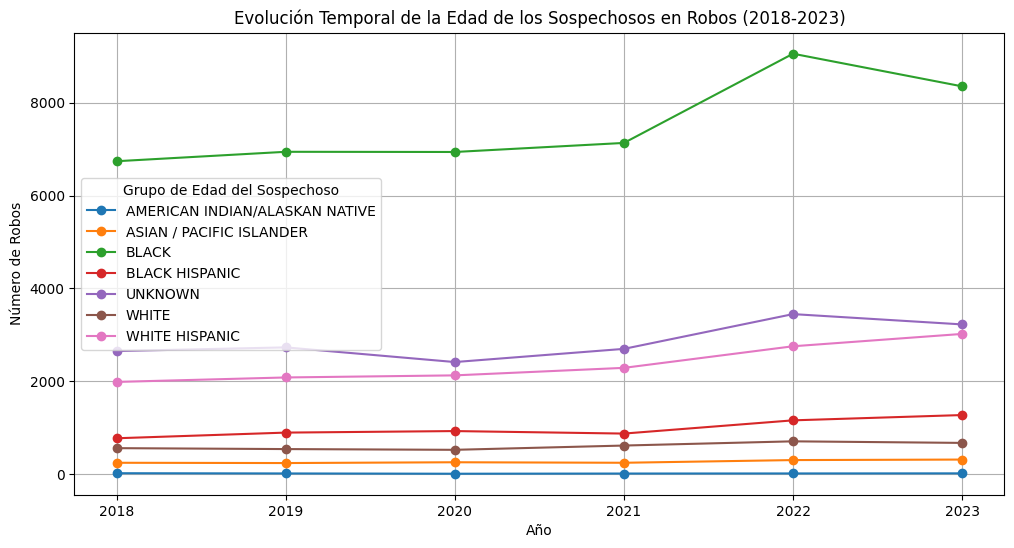

In [ ]:
# Crear el gráfico de líneas para visualizar la tendencia a lo largo del tiempo
plt.figure(figsize=(12, 6))
for age_group in age_group_counts.columns:
    plt.plot(age_group_counts.index, age_group_counts[age_group], marker='o', label=age_group)


plt.title('Evolución Temporal de la Edad de los Sospechosos en Robos (2018-2023)')
plt.xlabel('Año')
plt.ylabel('Número de Robos')
plt.legend(title='Grupo de Edad del Sospechoso')
plt.grid(True)
plt.show()

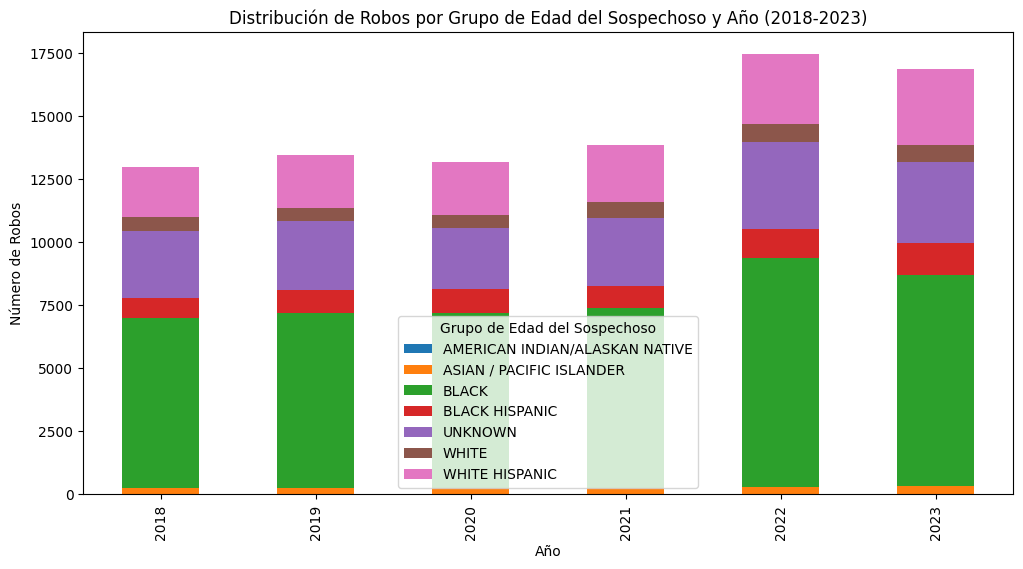

In [ ]:
# Crear el gráfico de barras para una visualización alternativa
age_group_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribución de Robos por Grupo de Edad del Sospechoso y Año (2018-2023)')
plt.xlabel('Año')
plt.ylabel('Número de Robos')
plt.legend(title='Grupo de Edad del Sospechoso')
plt.show()

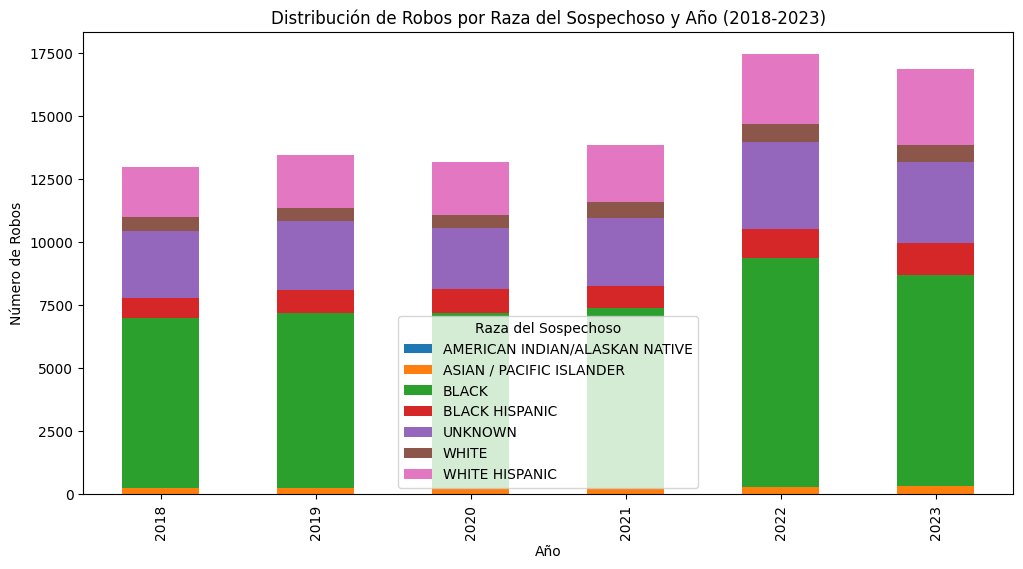

In [ ]:
# Crear un gráfico de barras apiladas por año y raza del sospechoso
age_group_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribución de Robos por Raza del Sospechoso y Año (2018-2023)')
plt.xlabel('Año')
plt.ylabel('Número de Robos')
plt.legend(title='Raza del Sospechoso')
plt.show()


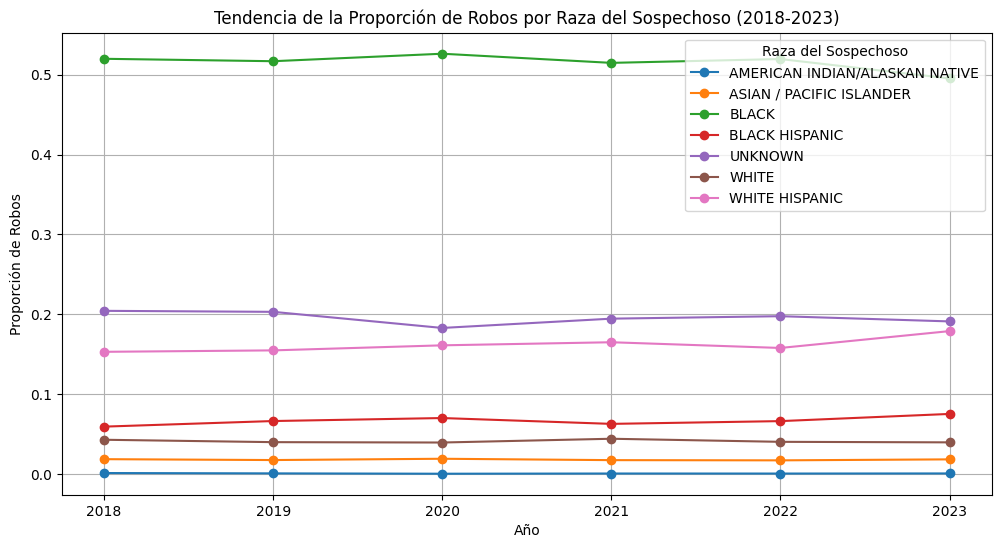

In [ ]:
# Crear un gráfico de líneas que muestra la tendencia en la proporción de robos por raza del sospechoso
plt.figure(figsize=(12, 6))
proportion_race = (age_group_counts.T / age_group_counts.T.sum()).T
for race_group in proportion_race.columns:
    plt.plot(proportion_race.index, proportion_race[race_group], marker='o', label=race_group)

plt.title('Tendencia de la Proporción de Robos por Raza del Sospechoso (2018-2023)')
plt.xlabel('Año')
plt.ylabel('Proporción de Robos')
plt.legend(title='Raza del Sospechoso')
plt.grid(True)
plt.show()

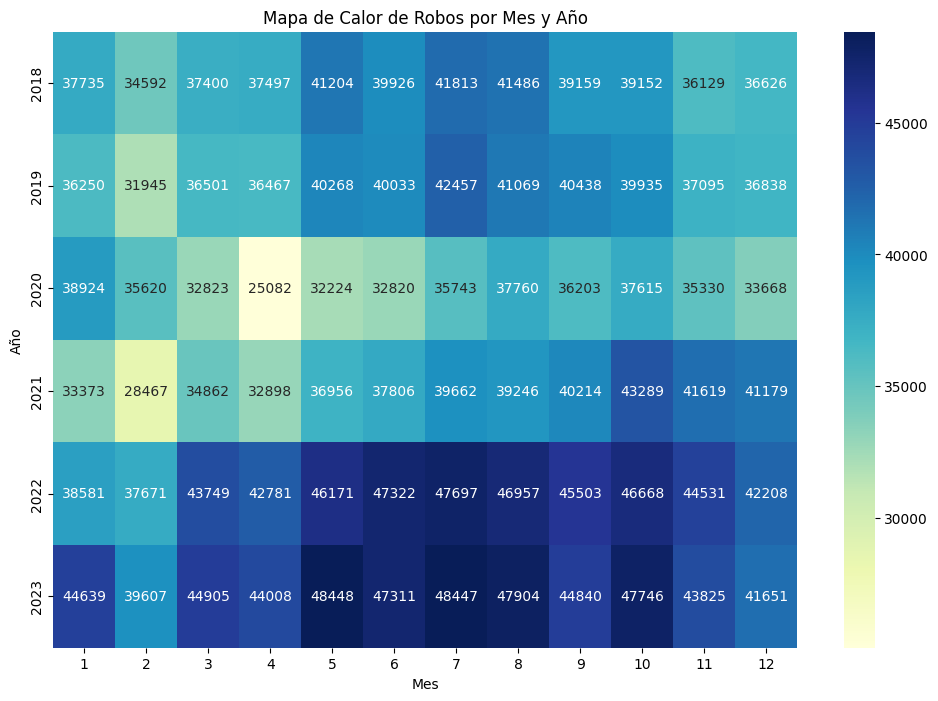

In [ ]:
historic_data_select_1_df = historic_data_select_df

historic_data_select_1_df['CMPLNT_FR_DT'] = pd.to_datetime(historic_data_select_1_df['CMPLNT_FR_DT'], errors='coerce')

# Extraer el año y mes de la fecha del delito
historic_data_select_1_df['Year'] = historic_data_select_1_df['CMPLNT_FR_DT'].dt.year
historic_data_select_1_df['Month'] = historic_data_select_1_df['CMPLNT_FR_DT'].dt.month
# Agrupar por año y mes, y contar la frecuencia de robos
monthly_counts = historic_data_select_1_df.groupby(['Year', 'Month']).size().unstack(fill_value=0)

# Crear el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_counts, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Mapa de Calor de Robos por Mes y Año')
plt.xlabel('Mes')
plt.ylabel('Año')
plt.show()

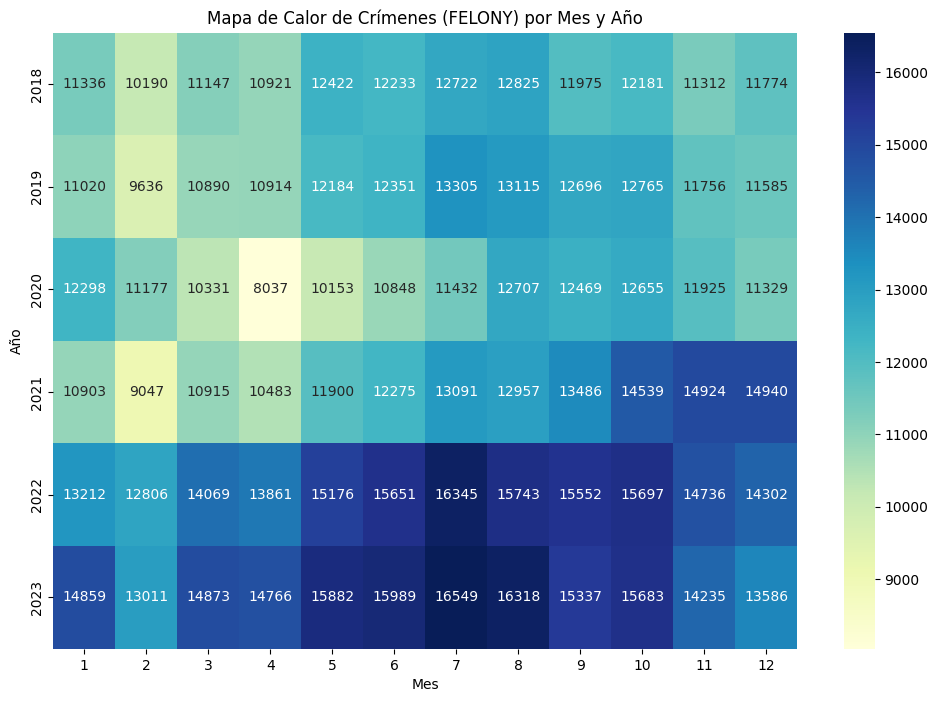

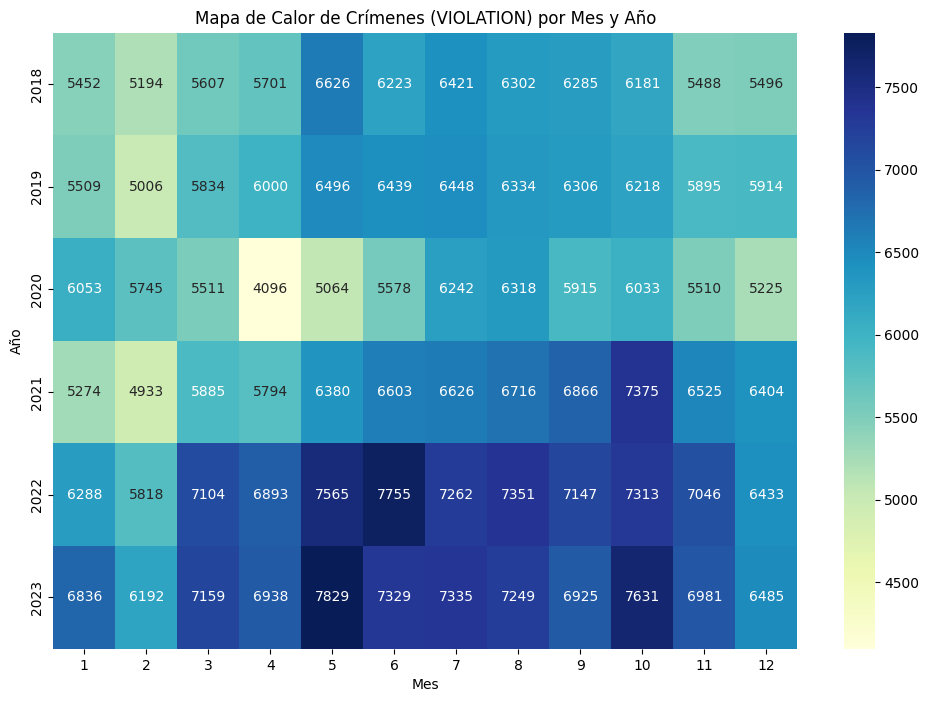

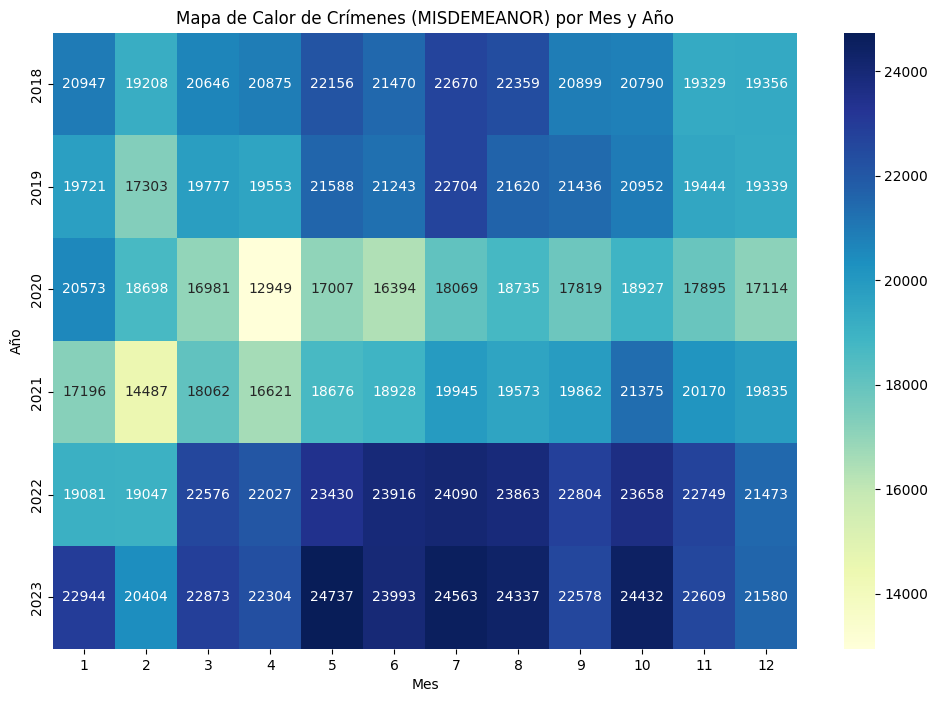

In [ ]:
# Obtener una lista de todos los niveles de delito únicos
unique_law_cats = historic_data_select_df['LAW_CAT_CD'].unique()
# Extraer el año y mes de la fecha del delito

# Iterar sobre cada nivel de delito
for law_cat in unique_law_cats:
    # Filtrar el DataFrame para el nivel de delito específico
    filtered_data = historic_data_select_df[historic_data_select_df['LAW_CAT_CD'] == law_cat]
    filtered_data['Year'] = filtered_data['CMPLNT_FR_DT'].dt.year
    filtered_data['Month'] = filtered_data['CMPLNT_FR_DT'].dt.month
    # Calcular la frecuencia de crímenes por año y mes
    crime_counts = filtered_data.groupby(['Year', 'Month']).size().unstack(fill_value=0)

    # Crear el mapa de calor
    plt.figure(figsize=(12, 8))
    sns.heatmap(crime_counts, annot=True, fmt='d', cmap='YlGnBu')
    plt.title(f'Mapa de Calor de Crímenes ({law_cat}) por Mes y Año')
    plt.xlabel('Mes')
    plt.ylabel('Año')
    plt.show()

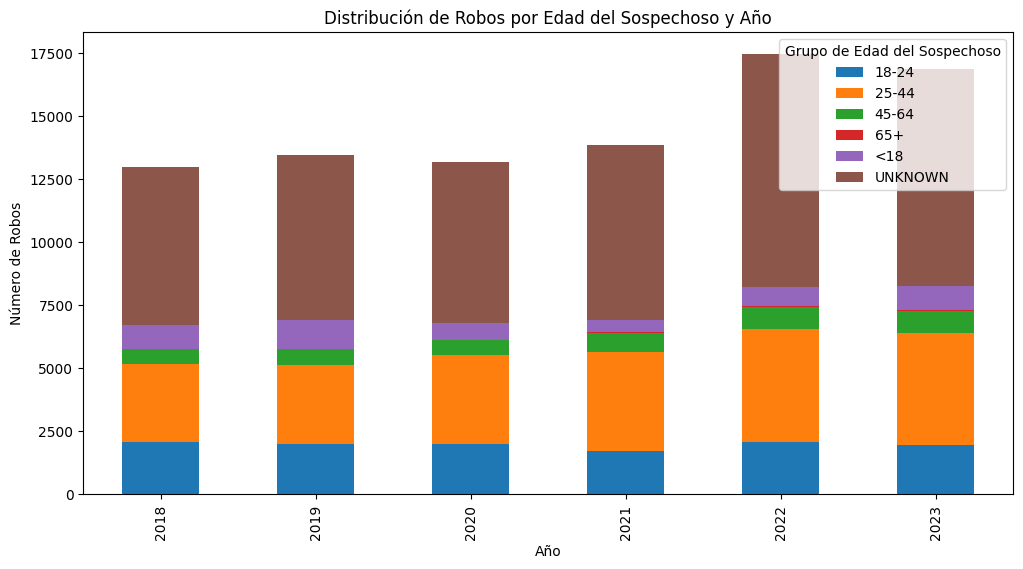

In [ ]:
# Agrupar por año y grupo de edad del sospechoso, y contar la frecuencia de robos
age_year_counts = robbery_df.groupby(['Year', 'SUSP_AGE_GROUP']).size().unstack(fill_value=0)

# Crear el gráfico de barras apiladas
age_year_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribución de Robos por Edad del Sospechoso y Año')
plt.xlabel('Año')
plt.ylabel('Número de Robos')
plt.legend(title='Grupo de Edad del Sospechoso')
plt.show()

In [ ]:
##########Delitos#############

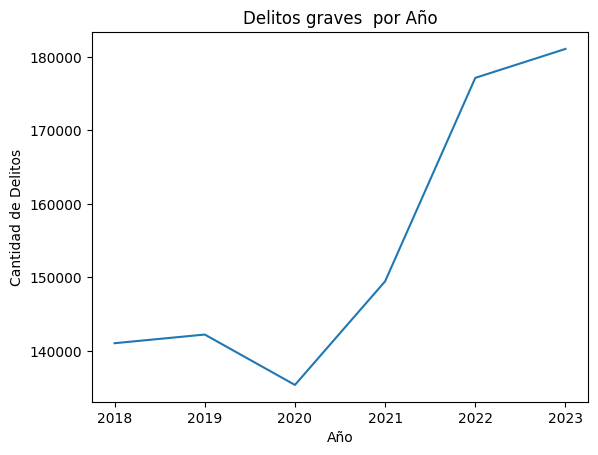

In [ ]:
felonias_por_anio = historic_data_select_df[historic_data_select_df['LAW_CAT_CD'] == 'FELONY'].groupby('Year')['CMPLNT_NUM'].count()
felonias_por_anio.plot(kind='line', xlabel='Año', ylabel='Cantidad de Delitos', title='Delitos graves  por Año')
plt.show()



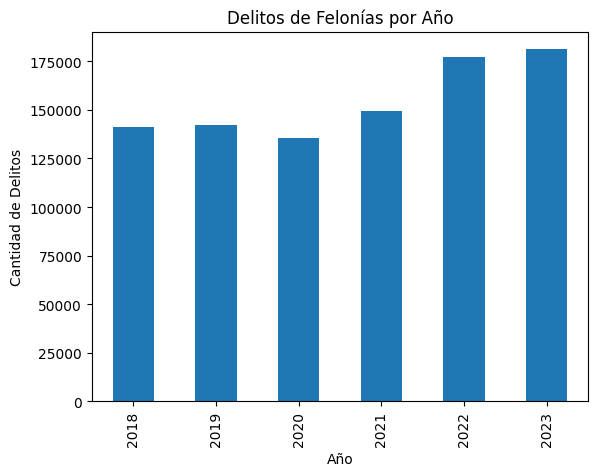

In [ ]:
felonias_por_anio = historic_data_select_df[historic_data_select_df['LAW_CAT_CD'] == 'FELONY'].groupby('Year')['CMPLNT_NUM'].count()
felonias_por_anio.plot(kind='bar', xlabel='Año', ylabel='Cantidad de Delitos', title='Delitos de Felonías por Año')
plt.show()

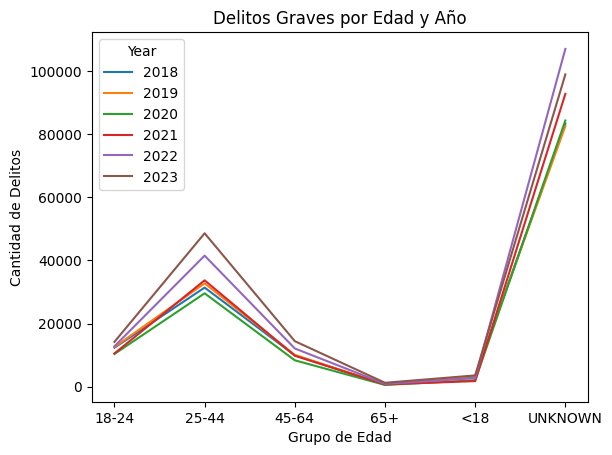

In [ ]:
# Gráfico de Línea de Delitos Graves por Edad y Año
delitos_graves_por_edad_y_anio = historic_data_select_df[historic_data_select_df['LAW_CAT_CD'] == 'FELONY'].groupby(['SUSP_AGE_GROUP', 'Year'])['CMPLNT_NUM'].count().unstack()
delitos_graves_por_edad_y_anio.plot(kind='line', xlabel='Grupo de Edad', ylabel='Cantidad de Delitos', title='Delitos Graves por Edad y Año')
plt.show()



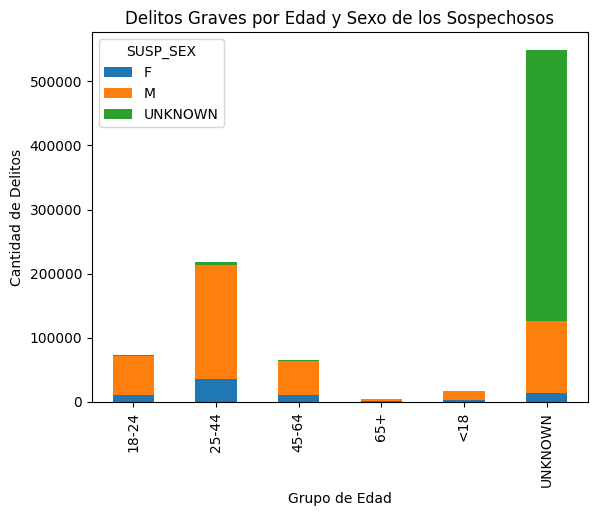

In [ ]:
# Gráfico de Barras Apiladas de Delitos Graves por Edad y Sexo
delitos_graves_por_edad_y_sexo = historic_data_select_df[historic_data_select_df['LAW_CAT_CD'] == 'FELONY'].groupby(['SUSP_AGE_GROUP', 'SUSP_SEX'])['CMPLNT_NUM'].count().unstack()
delitos_graves_por_edad_y_sexo.plot(kind='bar', stacked=True, xlabel='Grupo de Edad', ylabel='Cantidad de Delitos', title='Delitos Graves por Edad y Sexo de los Sospechosos')
plt.show()



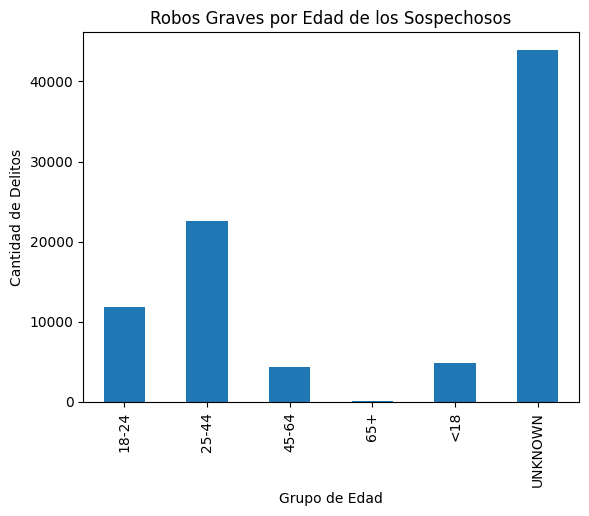

In [ ]:
# Gráfico de Barras de Delitos Graves por Edad y Tipo de Delito (Por ejemplo, Robo)
delitos_graves_por_edad_y_tipo = historic_data_select_df[historic_data_select_df['LAW_CAT_CD'] == 'FELONY'].groupby(['SUSP_AGE_GROUP', 'OFNS_DESC'])['CMPLNT_NUM'].count().unstack()
delitos_graves_por_edad_y_tipo['ROBBERY'].plot(kind='bar', xlabel='Grupo de Edad', ylabel='Cantidad de Delitos', title='Robos Graves por Edad de los Sospechosos')
plt.show()

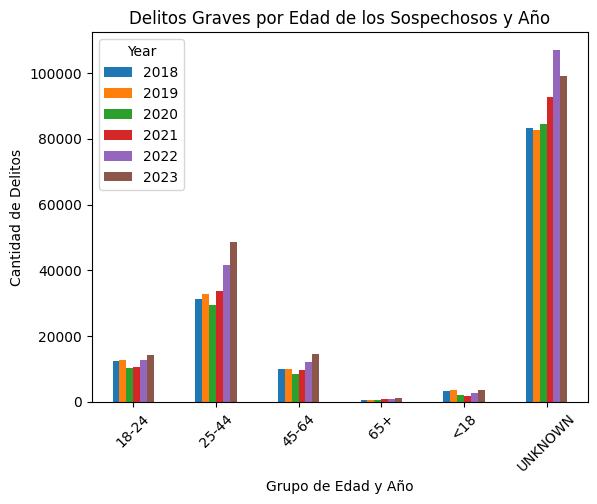

In [ ]:
# Gráfico de Histograma de Delitos Graves por Edad de los Sospechosos con Año
delitos_graves_por_edad_y_anio = historic_data_select_df[historic_data_select_df['LAW_CAT_CD'] == 'FELONY'].groupby(['SUSP_AGE_GROUP', 'Year'])['CMPLNT_NUM'].count().unstack()
delitos_graves_por_edad_y_anio.plot(kind='bar', xlabel='Grupo de Edad y Año', ylabel='Cantidad de Delitos', title='Delitos Graves por Edad de los Sospechosos y Año')
plt.xticks(rotation=45)
plt.show()



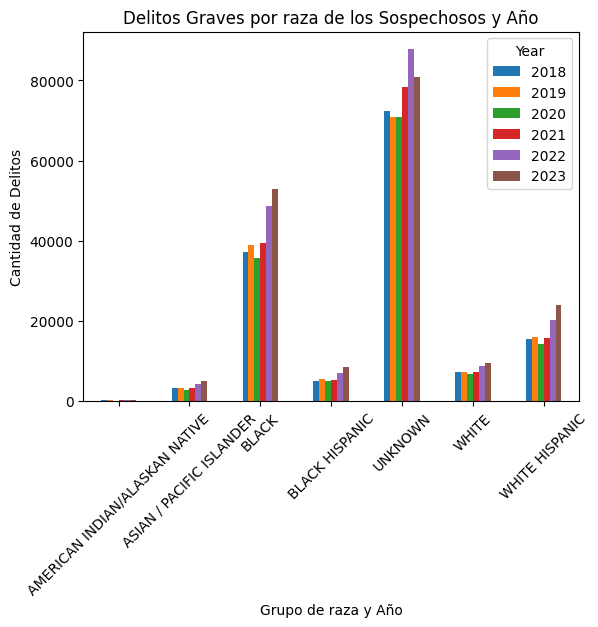

In [ ]:
# Gráfico de Histograma de Delitos Graves por Edad de los Sospechosos con Año
delitos_graves_por_edad_y_anio = historic_data_select_df[historic_data_select_df['LAW_CAT_CD'] == 'FELONY'].groupby(['SUSP_RACE', 'Year'])['CMPLNT_NUM'].count().unstack()
delitos_graves_por_edad_y_anio.plot(kind='bar', xlabel='Grupo de raza y Año', ylabel='Cantidad de Delitos', title='Delitos Graves por raza de los Sospechosos y Año')
plt.xticks(rotation=45)
plt.show()



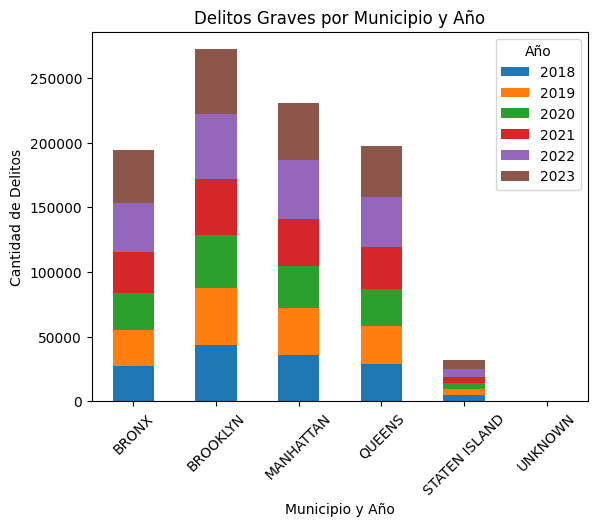

In [ ]:
 #Filtrar los delitos graves (felonías)
delitos_graves = historic_data_select_df[historic_data_select_df['LAW_CAT_CD'] == 'FELONY']

# Contar la cantidad de delitos graves por municipio y año
delitos_graves_por_municipio_y_anio = delitos_graves.groupby(['BORO_NM', 'Year'])['CMPLNT_NUM'].count().unstack()

# Crear un gráfico de barras para visualizar los delitos graves por municipio y año
delitos_graves_por_municipio_y_anio.plot(kind='bar', stacked=True, xlabel='Municipio y Año', ylabel='Cantidad de Delitos', title='Delitos Graves por Municipio y Año')
plt.xticks(rotation=45)
plt.legend(title='Año', bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
#delitos por año y municipio

In [ ]:
delitos_graves = historic_data_select_df[historic_data_select_df['LAW_CAT_CD'] == 'FELONY']
delitos_graves.groupby(['BORO_NM', 'Year']).size()

BORO_NM        Year
BRONX          2018    27227
               2019    28217
               2020    28101
               2021    31788
               2022    38118
               2023    40678
BROOKLYN       2018    43979
               2019    43942
               2020    41105
               2021    43293
               2022    49554
               2023    50282
MANHATTAN      2018    36146
               2019    36300
               2020    32306
               2021    36634
               2022    45197
               2023    43944
QUEENS         2018    28880
               2019    29092
               2020    29277
               2021    32528
               2022    38351
               2023    39585
STATEN ISLAND  2018     4802
               2019     4661
               2020     4570
               2021     5186
               2022     5903
               2023     6571
UNKNOWN        2018        4
               2019        5
               2020        2
               2021    

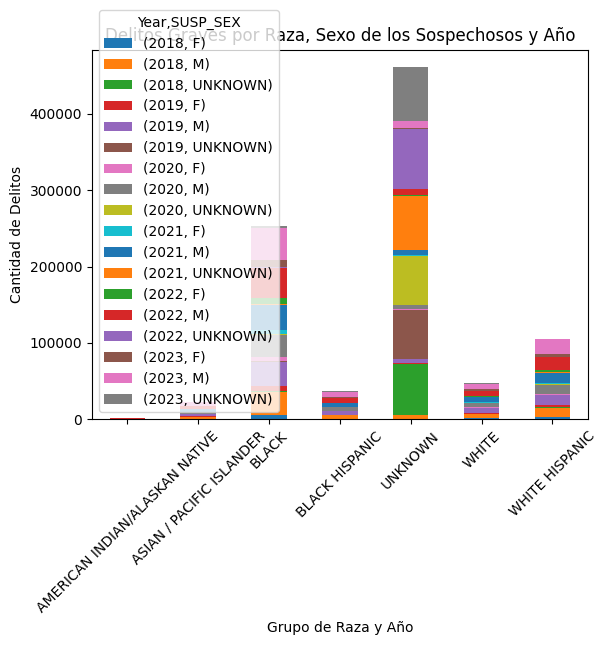

In [ ]:
# Gráfico de Barras Apiladas de Delitos Graves por Edad y Sexo con Año
delitos_graves_por_edad_y_sexo = historic_data_select_df[historic_data_select_df['LAW_CAT_CD'] == 'FELONY'].groupby(['SUSP_RACE', 'SUSP_SEX', 'Year'])['CMPLNT_NUM'].count().unstack().unstack()
delitos_graves_por_edad_y_sexo.plot(kind='bar', stacked=True, xlabel='Grupo de Raza y Año', ylabel='Cantidad de Delitos', title='Delitos Graves por Raza, Sexo de los Sospechosos y Año')
plt.xticks(rotation=45)
plt.show()


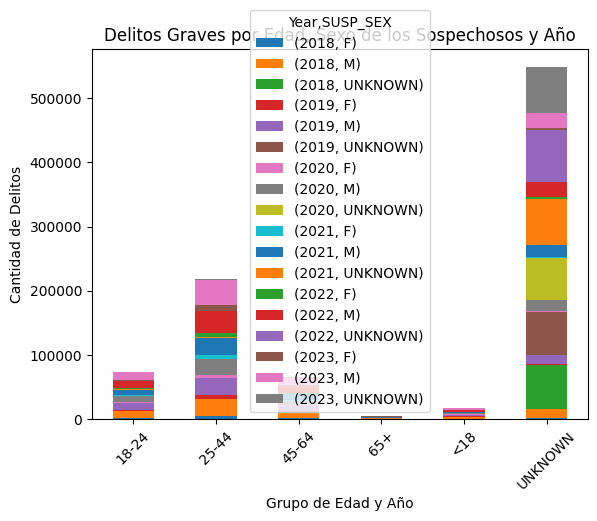

In [ ]:
# Gráfico de Barras Apiladas de Delitos Graves por Edad y Sexo con Año
delitos_graves_por_edad_y_sexo = historic_data_select_df[historic_data_select_df['LAW_CAT_CD'] == 'FELONY'].groupby(['SUSP_AGE_GROUP', 'SUSP_SEX', 'Year'])['CMPLNT_NUM'].count().unstack().unstack()
delitos_graves_por_edad_y_sexo.plot(kind='bar', stacked=True, xlabel='Grupo de Edad y Año', ylabel='Cantidad de Delitos', title='Delitos Graves por Edad, Sexo de los Sospechosos y Año')
plt.xticks(rotation=45)
plt.show()


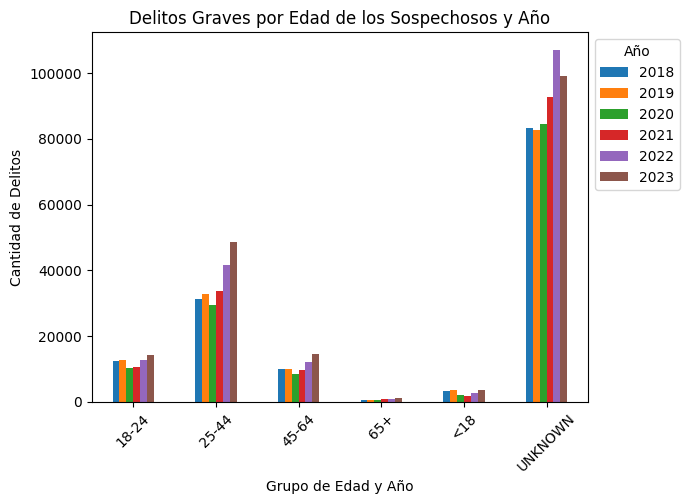

In [ ]:
# Gráfico de Histograma de Delitos Graves por Edad de los Sospechosos con Año
delitos_graves_por_edad_y_anio = historic_data_select_df[historic_data_select_df['LAW_CAT_CD'] == 'FELONY'].groupby(['SUSP_AGE_GROUP', 'Year'])['CMPLNT_NUM'].count().unstack()
delitos_graves_por_edad_y_anio.plot(kind='bar', xlabel='Grupo de Edad y Año', ylabel='Cantidad de Delitos', title='Delitos Graves por Edad de los Sospechosos y Año')
plt.xticks(rotation=45)
plt.legend(title='Año', bbox_to_anchor=(1, 1))
plt.show()



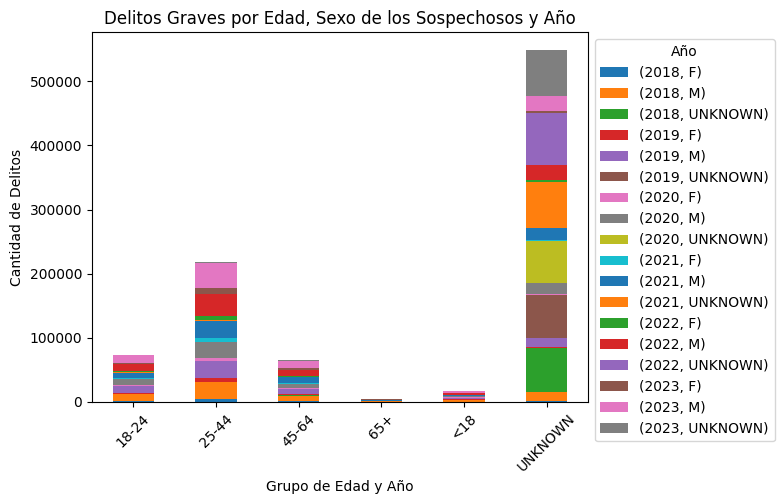

In [ ]:
# Gráfico de Barras Apiladas de Delitos Graves por Edad y Sexo con Año
delitos_graves_por_edad_y_sexo = historic_data_select_df[historic_data_select_df['LAW_CAT_CD'] == 'FELONY'].groupby(['SUSP_AGE_GROUP', 'SUSP_SEX', 'Year'])['CMPLNT_NUM'].count().unstack().unstack()
delitos_graves_por_edad_y_sexo.plot(kind='bar', stacked=True, xlabel='Grupo de Edad y Año', ylabel='Cantidad de Delitos', title='Delitos Graves por Edad, Sexo de los Sospechosos y Año')
plt.xticks(rotation=45)
plt.legend(title='Año', bbox_to_anchor=(1, 1))
plt.show()



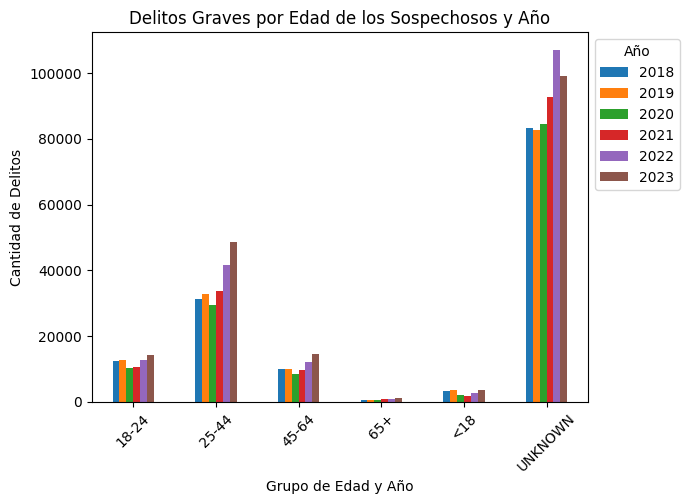

In [ ]:

# Gráfico de Barras de Delitos Graves por Edad y Año
delitos_graves_por_edad_y_tipo = historic_data_select_df[historic_data_select_df['LAW_CAT_CD'] == 'FELONY'].groupby(['SUSP_AGE_GROUP', 'Year'])['CMPLNT_NUM'].count().unstack()
delitos_graves_por_edad_y_tipo.plot(kind='bar', xlabel='Grupo de Edad y Año', ylabel='Cantidad de Delitos', title='Delitos Graves por Edad de los Sospechosos y Año')
plt.xticks(rotation=45)
plt.legend(title='Año', bbox_to_anchor=(1, 1))
plt.show()

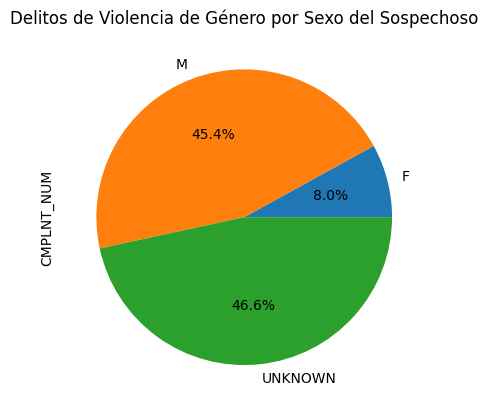

In [ ]:
# Gráfico de Torta de Delitos de Violencia de Género por Sexo del Sospechoso
violencia_genero_por_sexo_sospechoso = historic_data_select_df[historic_data_select_df['LAW_CAT_CD'] == 'FELONY'].groupby('SUSP_SEX')['CMPLNT_NUM'].count()
violencia_genero_por_sexo_sospechoso.plot(kind='pie', autopct='%1.1f%%', title='Delitos de Violencia de Género por Sexo del Sospechoso')
plt.show()



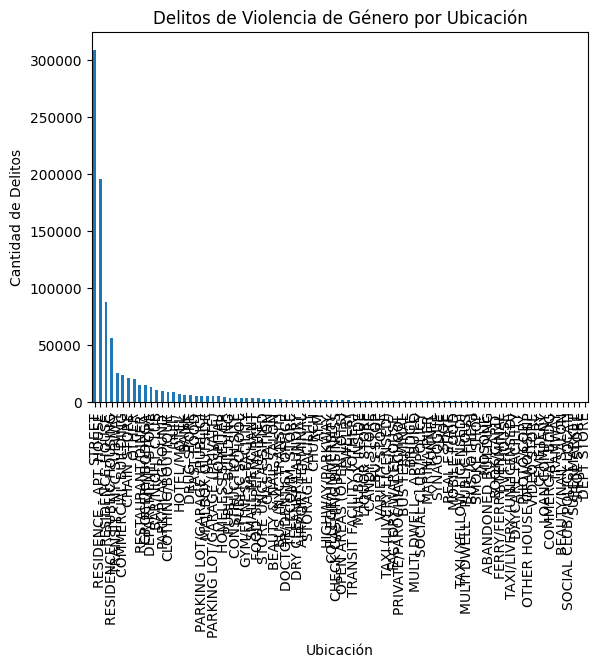

In [ ]:
# Gráfico de Barras de Delitos de Violencia de Género por Ubicación
violencia_genero_por_ubicacion = historic_data_select_df[historic_data_select_df['LAW_CAT_CD'] == 'FELONY'].groupby('PREM_TYP_DESC')['CMPLNT_NUM'].count().sort_values(ascending=False)
violencia_genero_por_ubicacion.plot(kind='bar', xlabel='Ubicación', ylabel='Cantidad de Delitos', title='Delitos de Violencia de Género por Ubicación')
plt.show()

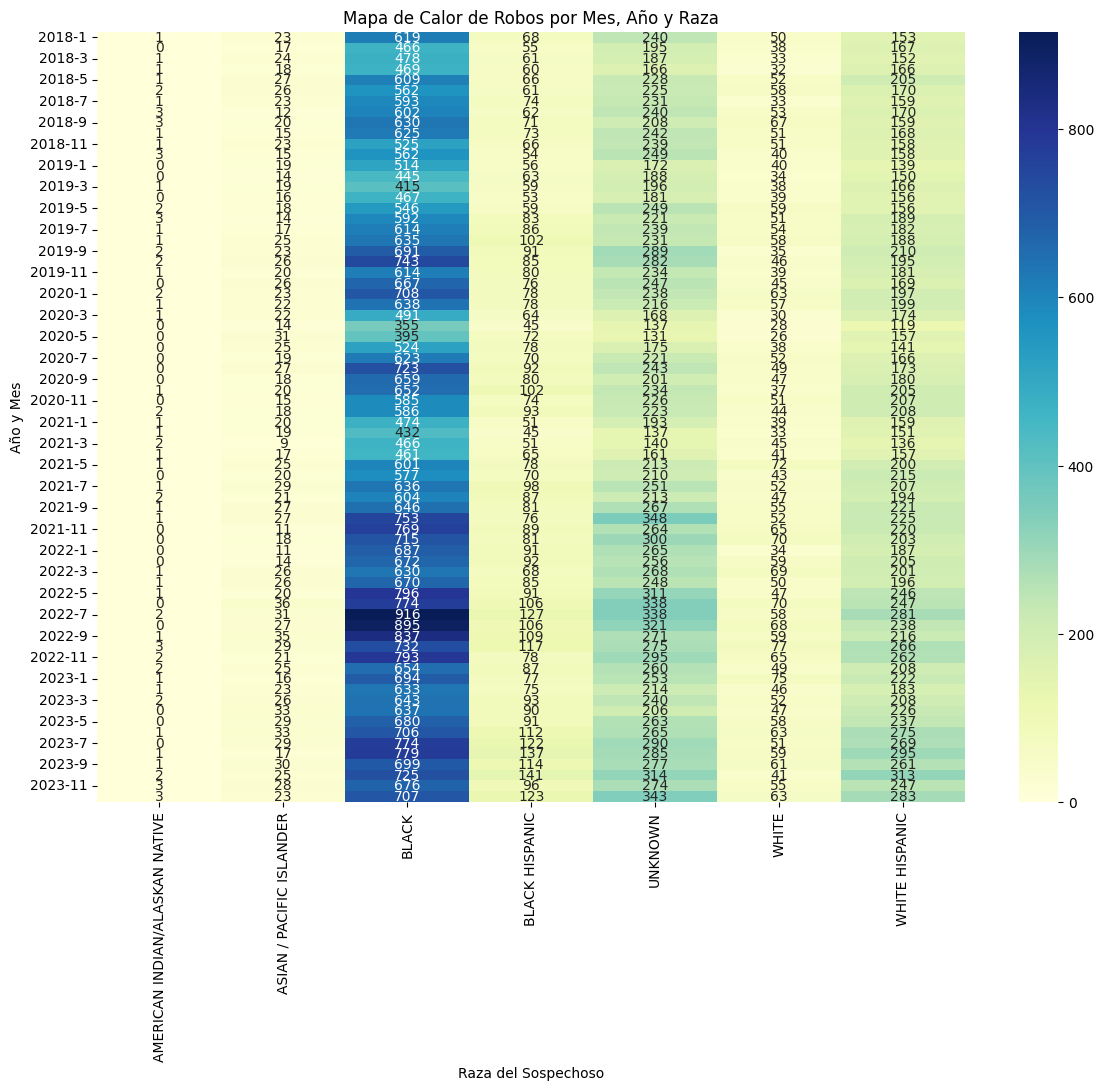

In [ ]:

historic_data_select_1_df = historic_data_select_df
# Filtrar los registros de robos
robbery_df = historic_data_select_1_df[historic_data_select_1_df['OFNS_DESC'] == 'ROBBERY']

# Convertir las fechas a datetime
robbery_df['CMPLNT_FR_DT'] = pd.to_datetime(robbery_df['CMPLNT_FR_DT'], errors='coerce')

# Extraer el año y el mes de la fecha del delito
robbery_df['Year'] = robbery_df['CMPLNT_FR_DT'].dt.year
robbery_df['Month'] = robbery_df['CMPLNT_FR_DT'].dt.month

# Filtrar los años de interés (2018-2023)
robbery_df = robbery_df[(robbery_df['Year'] >= 2018) & (robbery_df['Year'] <= 2023)]

# Crear una tabla pivote con MultiIndex (Year, Month) y columnas como las razas
pivot_table = pd.pivot_table(robbery_df, values='CMPLNT_NUM', index=['Year', 'Month'], columns='SUSP_RACE', aggfunc='count', fill_value=0)

# Crear el mapa de calor combinado
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Mapa de Calor de Robos por Mes, Año y Raza')
plt.xlabel('Raza del Sospechoso')
plt.ylabel('Año y Mes')
plt.show()

In [ ]:
historic_data_select_df.OFNS_DESC.unique()

array(['ROBBERY', 'SEX CRIMES', 'HARRASSMENT 2', 'PETIT LARCENY', 'ARSON',
       'RAPE', 'MISCELLANEOUS PENAL LAW', 'ASSAULT 3 & RELATED OFFENSES',
       'BURGLARY', 'MURDER & NON-NEGL. MANSLAUGHTER', 'DANGEROUS WEAPONS',
       'FELONY ASSAULT', 'FORGERY', 'DANGEROUS DRUGS',
       'POSSESSION OF STOLEN PROPERTY', 'FRAUDS',
       'CRIMINAL MISCHIEF & RELATED OF', 'OFFENSES AGAINST PUBLIC ADMINI',
       'INTOXICATED & IMPAIRED DRIVING', 'GRAND LARCENY',
       'GRAND LARCENY OF MOTOR VEHICLE', 'OFF. AGNST PUB ORD SENSBLTY &',
       'VEHICLE AND TRAFFIC LAWS', 'OTHER OFFENSES RELATED TO THEF',
       'THEFT-FRAUD', 'OFFENSES AGAINST THE PERSON', 'CRIMINAL TRESPASS',
       'UNAUTHORIZED USE OF A VEHICLE', 'ADMINISTRATIVE CODE',
       'PETIT LARCENY OF MOTOR VEHICLE', 'NYS LAWS-UNCLASSIFIED FELONY',
       'GAMBLING', 'OFFENSES INVOLVING FRAUD', "BURGLAR'S TOOLS",
       'AGRICULTURE & MRKTS LAW-UNCLASSIFIED',
       'OFFENSES AGAINST PUBLIC SAFETY', 'DISORDERLY CONDUCT',
       'I

**Tipo de crimenes**

In [ ]:
historic_data_select_df.OFNS_DESC.value_counts().iloc[:20]

OFNS_DESC
PETIT LARCENY                     568470
HARRASSMENT 2                     449476
ASSAULT 3 & RELATED OFFENSES      310326
CRIMINAL MISCHIEF & RELATED OF    272344
GRAND LARCENY                     263458
FELONY ASSAULT                    138993
OFF. AGNST PUB ORD SENSBLTY &     108429
ROBBERY                            87741
MISCELLANEOUS PENAL LAW            87708
BURGLARY                           80601
DANGEROUS DRUGS                    66285
VEHICLE AND TRAFFIC LAWS           64422
GRAND LARCENY OF MOTOR VEHICLE     59722
SEX CRIMES                         40351
OFFENSES AGAINST PUBLIC ADMINI     39958
DANGEROUS WEAPONS                  39487
FORGERY                            27789
INTOXICATED & IMPAIRED DRIVING     20542
THEFT-FRAUD                        20505
CRIMINAL TRESPASS                  15040
Name: count, dtype: int64

In [ ]:
historic_data_filtered_df = historic_data_select_df

<Axes: title={'center': 'Tipo de crimenes'}, ylabel='OFNS_DESC'>

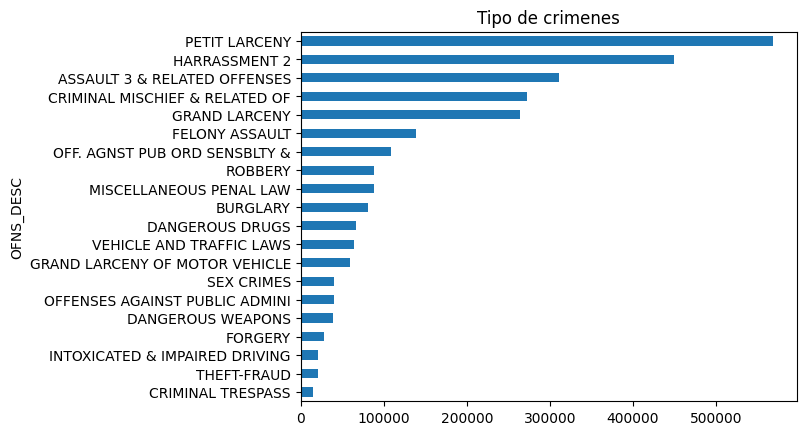

In [ ]:
historic_data_filtered_df.OFNS_DESC.value_counts().iloc[:20].sort_values().plot(kind="barh", title = "Tipo de crimenes")

array([<Axes: ylabel='count'>], dtype=object)

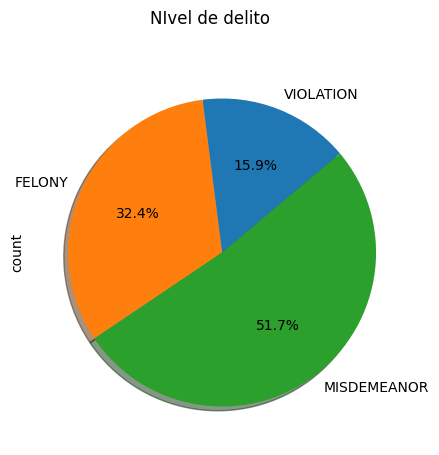

In [ ]:
historic_data_filtered_df['LAW_CAT_CD'].value_counts().sort_values().plot(kind='pie', subplots=True, shadow = True,startangle=40,
figsize=(10,5), autopct='%1.1f%%', title = 'NIvel de delito')

**crimenes por año**

476428.0


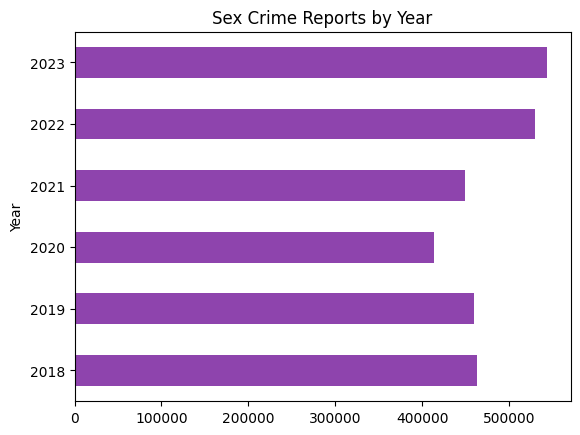

In [ ]:
#plot graph
historic_data_filtered_df.groupby('Year').size().plot(kind = 'barh', color = '#8E44AD', title = 'Sex Crime Reports by Year')

#average sex crimes per year
mean = historic_data_filtered_df['Year'].value_counts().mean()
print(round(mean,2))

VIC_SEX
F         39.170516
M         34.881434
D         15.450192
E         10.315498
L          0.182180
(null)     0.000150
U          0.000030
Name: count, dtype: float64


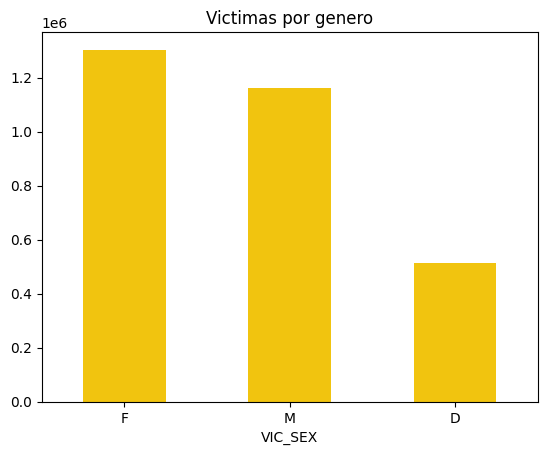

In [ ]:
historic_data_filtered_df['VIC_SEX'].value_counts().iloc[:3].plot(kind="bar",  color = '#F1C40F', title = 'Victimas por genero', rot=0)

#Procentajes
vic_sex_per = historic_data_filtered_df['VIC_SEX'].value_counts() / historic_data_filtered_df['VIC_SEX'].shape[0] *100
print(vic_sex_per)

VIC_AGE_GROUP
25-44      35.772104
UNKNOWN    27.738135
45-64      19.071813
65+         4.621550
<18         3.774704
Name: count, dtype: float64


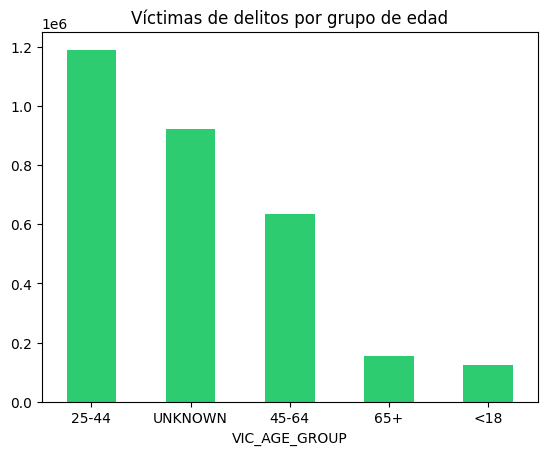

In [ ]:
historic_data_filtered_df['VIC_AGE_GROUP'].value_counts().iloc[[0,1,2,4,5]].plot(kind="bar", color = '#2ECC71', title = 'Víctimas de delitos por grupo de edad', rot=0)

#porcentajes
porcentaje_victimas = historic_data_filtered_df['VIC_AGE_GROUP'].value_counts().iloc[[0,1,2,4,5]] / historic_data_filtered_df['VIC_AGE_GROUP'].shape[0] *100
print(porcentaje_victimas)

VIC_RACE
UNKNOWN                           29.833126
BLACK                             25.113768
WHITE HISPANIC                    17.564089
WHITE                             15.284454
ASIAN / PACIFIC ISLANDER           7.628491
BLACK HISPANIC                     4.116070
AMERICAN INDIAN/ALASKAN NATIVE     0.448972
Name: count, dtype: float64


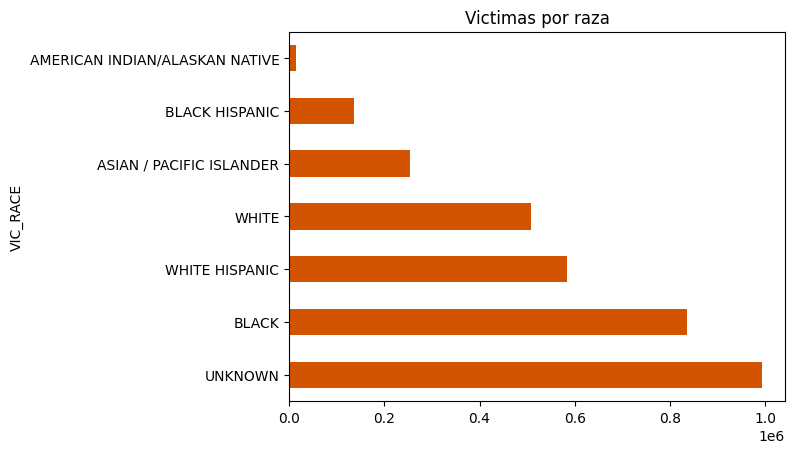

In [ ]:
historic_data_filtered_df['VIC_RACE'].value_counts().iloc[:7].plot(kind="barh", color = '#D35400', title = 'Victimas por raza')

#procentajes
procentaje_razas = historic_data_filtered_df['VIC_RACE'].value_counts().iloc[:7] / historic_data_filtered_df['VIC_RACE'].shape[0] *100
print(procentaje_razas)

In [ ]:
with pd.option_context('display.max_rows', None):
    # Realizar la operación de agrupación
    grouped_data = historic_data_filtered_df.groupby('Year').size()

    # Imprimir o hacer lo que necesites con grouped_data
    print(grouped_data)

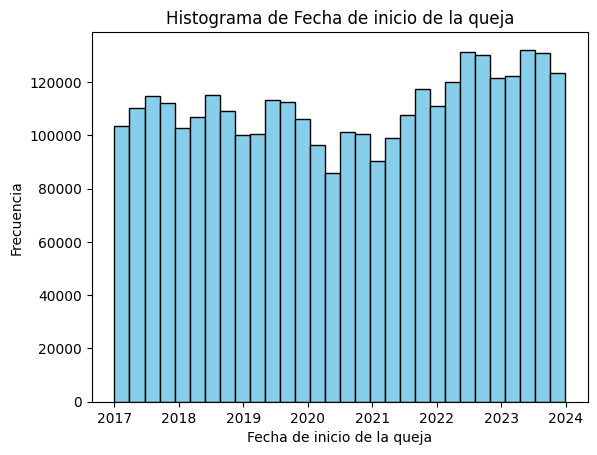

In [ ]:
plt.hist(historic_data_filtered_df['CMPLNT_FR_DT'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Fecha de inicio de la queja')
plt.ylabel('Frecuencia')
plt.title('Histograma de Fecha de inicio de la queja')
plt.show()

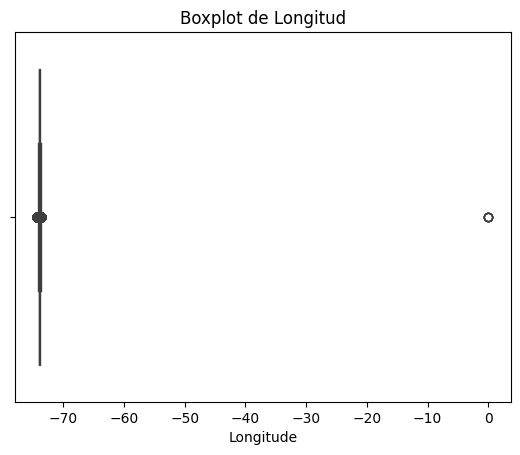

In [ ]:
sns.boxplot(x=historic_data_filtered_df['Longitude'])
plt.xlabel('Longitude')
plt.title('Boxplot de Longitud')
plt.show()

In [ ]:
duplicados_historic_data_df = historic_data_filtered_df.duplicated().any()
duplicados_historic_data_df

False

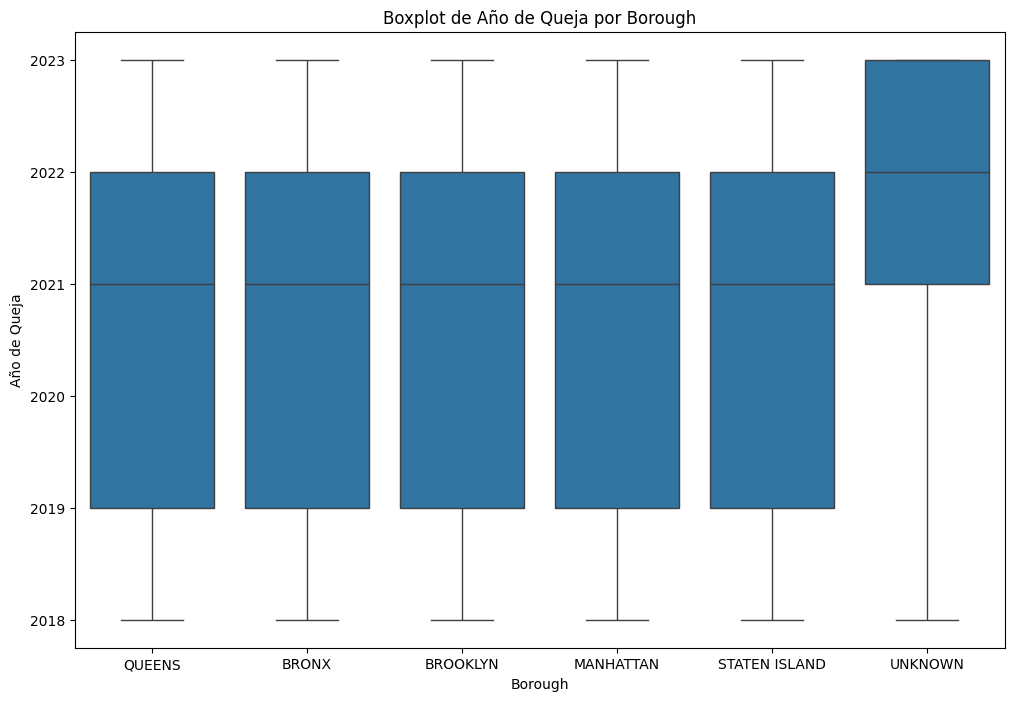

In [ ]:
# Convertir CMPLNT_FR_DT a datetime si no está ya en ese formato
#historic_data_filtered_df['CMPLNT_FR_DT'] = historic_data_filtered_df.to_datetime(df['CMPLNT_FR_DT'], errors='coerce')

# Extraer solo el año de CMPLNT_FR_DT para análisis
historic_data_filtered_df['Year'] = historic_data_filtered_df['CMPLNT_FR_DT'].dt.year

# Boxplot para la columna Year agrupado por BORO
plt.figure(figsize=(12, 8))
sns.boxplot(x='BORO_NM', y='Year', data=historic_data_filtered_df)
plt.title('Boxplot de Año de Queja por Borough')
plt.xlabel('Borough')
plt.ylabel('Año de Queja')
plt.show()

In [ ]:
historic_data_filtered_df.groupby('OFNS_DESC').size()

OFNS_DESC
(null)                                     58
ABORTION                                    1
ADMINISTRATIVE CODE                      6662
AGRICULTURE & MRKTS LAW-UNCLASSIFIED      817
ALCOHOLIC BEVERAGE CONTROL LAW            485
                                        ...  
THEFT OF SERVICES                        1423
THEFT-FRAUD                             20505
UNAUTHORIZED USE OF A VEHICLE            9026
UNLAWFUL POSS. WEAP. ON SCHOOL             37
VEHICLE AND TRAFFIC LAWS                64422
Length: 69, dtype: int64

In [ ]:
with pd.option_context('display.max_rows', None):
    # Realizar la operación de agrupación
    grouped_data = historic_data_filtered_df.groupby('Year').size()

    # Imprimir o hacer lo que necesites con grouped_data
    print(grouped_data)

Year
2018    462719
2019    459296
2020    413812
2021    449571
2022    529839
2023    543331
dtype: int64
